# Stacks and Queues 

## Balanced Brackets

A bracket is considered to be any one of the following characters: (, ), {, }, [, or ].

Two brackets are considered to be a matched pair if the an opening bracket (i.e., (, [, or {) occurs to the left of a closing bracket (i.e., ), ], or }) of the exact same type. There are three types of matched pairs of brackets: [], {}, and ().

A matching pair of brackets is not balanced if the set of brackets it encloses are not matched. For example, {[(])} is not balanced because the contents in between { and } are not balanced. The pair of square brackets encloses a single, unbalanced opening bracket, (, and the pair of parentheses encloses a single, unbalanced closing square bracket, ].

By this logic, we say a sequence of brackets is balanced if the following conditions are met:

It contains no unmatched brackets.
The subset of brackets enclosed within the confines of a matched pair of brackets is also a matched pair of brackets.
Given  strings of brackets, determine whether each sequence of brackets is balanced. If a string is balanced, return YES. Otherwise, return NO.

Function Description

Complete the function isBalanced in the editor below.

isBalanced has the following parameter(s):

string s: a string of brackets
Returns

string: either YES or NO
Input Format

The first line contains a single integer , the number of strings.
Each of the next  lines contains a single string , a sequence of brackets.

```python
#!/bin/python3

import math
import os
import random
import re
import sys
    
def isBalanced(s):
    if len(s) % 2 == 1:
        return 'NO'

    d = {'{': '}', '[': ']', '(': ')'}
    stack = []
    for i in s:
        # in stack
        if i in d:
            stack.append(i)
        else:
            if not stack or d[stack.pop()] != i:
                return 'NO'

    return 'YES' if stack == [] else 'NO'

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    t = int(input().strip())

    for t_itr in range(t):
        s = input()

        result = isBalanced(s)

        fptr.write(result + '\n')

    fptr.close()

```

## Queues: A Tale of Two Stacks

A queue is an abstract data type that maintains the order in which elements were added to it, allowing the oldest elements to be removed from the front and new elements to be added to the rear. This is called a First-In-First-Out (FIFO) data structure because the first element added to the queue (i.e., the one that has been waiting the longest) is always the first one to be removed.

A basic queue has the following operations:

Enqueue: add a new element to the end of the queue.
Dequeue: remove the element from the front of the queue and return it.
In this challenge, you must first implement a queue using two stacks. Then process  queries, where each query is one of the following  types:

1 x: Enqueue element  into the end of the queue.
2: Dequeue the element at the front of the queue.
3: Print the element at the front of the queue.
For example, a series of queries might be as follows:

image

Function Description

Complete the put, pop, and peek methods in the editor below. They must perform the actions as described above.

Input Format

The first line contains a single integer, , the number of queries.

Each of the next  lines contains a single query in the form described in the problem statement above. All queries start with an integer denoting the query , but only query  is followed by an additional space-separated value, , denoting the value to be enqueued.


```python
class MyQueue(object):
    def __init__(self):
        self.first = []
        self.second = []
    
    def peek(self):
        return self.first[0]
        
    def pop(self):
        if len(self.first) > 0:
            self.first = self.first[1:]
        # self.second.pop()
        
    def put(self, value):
        self.first.append(value)
        # self.second = [value] + self.second

queue = MyQueue()
t = int(raw_input())
for line in xrange(t):
    values = map(int, raw_input().split())
    
    if values[0] == 1:
        queue.put(values[1])        
    elif values[0] == 2:
        queue.pop()
    else:
        print queue.peek()
```

## Largest Rectangle

Skyline Real Estate Developers is planning to demolish a number of old, unoccupied buildings and construct a shopping mall in their place. Your task is to find the largest solid area in which the mall can be constructed.

There are a number of buildings in a certain two-dimensional landscape. Each building has a height, given by . If you join  adjacent buildings, they will form a solid rectangle of area .

Example

A rectangle of height  and length  can be constructed within the boundaries. The area formed is .

Function Description

Complete the function largestRectangle int the editor below. It should return an integer representing the largest rectangle that can be formed within the bounds of consecutive buildings.

largestRectangle has the following parameter(s):

int h[n]: the building heights
Returns
- long: the area of the largest rectangle that can be formed within the bounds of consecutive buildings

Input Format

The first line contains , the number of buildings.
The second line contains  space-separated integers, each the height of a building.

![sample](https://s3.amazonaws.com/hr-challenge-images/8136/1436794554-75e178e325-drawing47.svg)

```python
#!/bin/python3

import math
import os
import random
import re
import sys

#
# Complete the 'largestRectangle' function below.
#
# The function is expected to return a LONG_INTEGER.
# The function accepts INTEGER_ARRAY h as parameter.
#

def largestRectangle(h):
    ans = len(h)
    s = []
    h.append(0)
    for i in range(len(h)):
        left_index = i
        while len(s) > 0 and s[-1][0] >= h[i]:
            last = s.pop()
            left_index = last[1]
            ans = max(ans, h[i] * (i + 1 - last[1]))
            ans = max(ans, last[0] * (i - last[1]))

        s.append((h[i], left_index))
    return ans


if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    n = int(input().strip())

    h = list(map(int, input().rstrip().split()))

    result = largestRectangle(h)

    fptr.write(str(result) + '\n')

    fptr.close()
```

## Min Max Riddle


Given an integer array of size , find the maximum of the minimum(s) of every window size in the array. The window size varies from  to .

For example, given , consider window sizes of  through . Windows of size  are . The maximum value of the minimum values of these windows is . Windows of size  are  and their minima are . The maximum of these values is . Continue this process through window size  to finally consider the entire array. All of the answers are .

Function Description

Complete the riddle function in the editor below. It must return an array of integers representing the maximum minimum value for each window size from  to .

riddle has the following parameter(s):

arr: an array of integers
Input Format

The first line contains a single integer, , the size of .
The second line contains  space-separated integers, each an .

Constraints



Output Format

Single line containing  space-separated integers denoting the output for each window size from  to .


```python
#!/bin/python3

import math
import os
import random
import re
import sys
import itertools

# Complete the riddle function below.
def riddle(arr):
    n=len(arr)
    res=[0]*n
    S=[0]*n

    st=[0]
    for i in range(1,n):
        while len(st)>0 and arr[st[-1]]>=arr[i]:
            st.pop()
        if len(st)==0:
            S[i]=i+1-1
        else:
            S[i]=i-st[-1]-1
        st.append(i)
    print(S)

    st=[n-1]
    for i in range(n-2,-1,-1):
        while len(st)>0 and arr[i]<=arr[st[-1]]:
            st.pop()
        if len(st)==0:
            S[i]+=n-1-i
        else:
            S[i]+=st[-1]-i-1
        st.append(i)
    print(S)

    for i in range(n):
        if res[S[i]]<arr[i]:
            res[S[i]]=arr[i]
    print(res)

    for j in range(n-2,-1,-1):
        res[j]=max(res[j],res[j+1])

    return res


if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    n = int(input())

    arr = list(map(int, input().rstrip().split()))

    res = riddle(arr)

    fptr.write(' '.join(map(str, res)))
    fptr.write('\n')

    fptr.close()
```


## Poisonous Plants

There are a number of plants in a garden. Each of the plants has been treated with some amount of pesticide. After each day, if any plant has more pesticide than the plant on its left, being weaker than the left one, it dies.

You are given the initial values of the pesticide in each of the plants. Determine the number of days after which no plant dies, i.e. the time after which there is no plant with more pesticide content than the plant to its left.

Example

 // pesticide levels

Use a -indexed array. On day , plants  and  die leaving . On day , plant  in  dies leaving . There is no plant with a higher concentration of pesticide than the one to its left, so plants stop dying after day .

Function Description
Complete the function poisonousPlants in the editor below.

poisonousPlants has the following parameter(s):

int p[n]: the pesticide levels in each plant
Returns
- int: the number of days until plants no longer die from pesticide

Input Format

The first line contains an integer , the size of the array .
The next line contains  space-separated integers .

```python
#!/bin/python3

import math
import os
import random
import re
import sys

# Complete the poisonousPlants function below.
def poisonousPlants(p):
    N = len(p)
    days = [0] * N
    st = [0]
    mi = p[0]
    for i in range(1, N):
        if p[i] > p[i-1]:
            days[i] = 1
        mi = min(mi, p[i])
        # print(mi)
        while st and p[st[-1]] >= p[i]:
            if p[i] > mi:
                days[i] = max(days[i], days[st[-1]] + 1)
            st.pop()
        st += [i]
        # print(days)
        # print(st)
    return max(days)

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    n = int(input())

    p = list(map(int, input().rstrip().split()))

    result = poisonousPlants(p)

    fptr.write(str(result) + '\n')

    fptr.close()
```


# Arrays

## 2D Array - DS

Given a  2D Array, :

1 1 1 0 0 0
0 1 0 0 0 0
1 1 1 0 0 0
0 0 0 0 0 0
0 0 0 0 0 0
0 0 0 0 0 0
An hourglass in  is a subset of values with indices falling in this pattern in 's graphical representation:

a b c
  d
e f g
There are  hourglasses in . An hourglass sum is the sum of an hourglass' values. Calculate the hourglass sum for every hourglass in , then print the maximum hourglass sum. The array will always be .

Example


-9 -9 -9  1 1 1 
 0 -9  0  4 3 2
-9 -9 -9  1 2 3
 0  0  8  6 6 0
 0  0  0 -2 0 0
 0  0  1  2 4 0
The  hourglass sums are:

-63, -34, -9, 12, 
-10,   0, 28, 23, 
-27, -11, -2, 10, 
  9,  17, 25, 18
The highest hourglass sum is  from the hourglass beginning at row , column :

0 4 3
  1
8 6 6
Note: If you have already solved the Java domain's Java 2D Array challenge, you may wish to skip this challenge.

Function Description

Complete the function hourglassSum in the editor below.

hourglassSum has the following parameter(s):

int arr[6][6]: an array of integers
Returns

int: the maximum hourglass sum

```python
#!/bin/python

import math
import os
import random
import re
import sys

# Complete the hourglassSum function below.
def hourglassSum(arr):
    result = []
    for i in xrange(len(arr)-2):
        for j in xrange(len(arr[i]) - 2):
            sum = (arr[i][j] + arr[i][j+1] + arr[i][j+2] + arr[i+1][j+1] + 
                   arr[i+2][j] + arr[i+2][j+1] + arr[i+2][j+2])
            result.append(sum)
    return max(result)
        

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    arr = []

    for _ in xrange(6):
        arr.append(map(int, raw_input().rstrip().split()))

    result = hourglassSum(arr)

    fptr.write(str(result) + '\n')

    fptr.close()
```

## Arrays: Left Rotation

A left rotation operation on an array shifts each of the array's elements  unit to the left. For example, if  left rotations are performed on array , then the array would become . Note that the lowest index item moves to the highest index in a rotation. This is called a circular array.

Given an array  of  integers and a number, , perform  left rotations on the array. Return the updated array to be printed as a single line of space-separated integers.

Function Description

Complete the function rotLeft in the editor below.

rotLeft has the following parameter(s):

int a[n]: the array to rotate
int d: the number of rotations
Returns

int a'[n]: the rotated array

```python
#!/bin/python

import math
import os
import random
import re
import sys

# Complete the rotLeft function below.
def rotLeft(a, d):
    return a[d:len(a)] + a[0:d]

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    nd = raw_input().split()

    n = int(nd[0])

    d = int(nd[1])

    a = map(int, raw_input().rstrip().split())

    result = rotLeft(a, d)

    fptr.write(' '.join(map(str, result)))
    fptr.write('\n')

    fptr.close()

```

## New Year Chaos
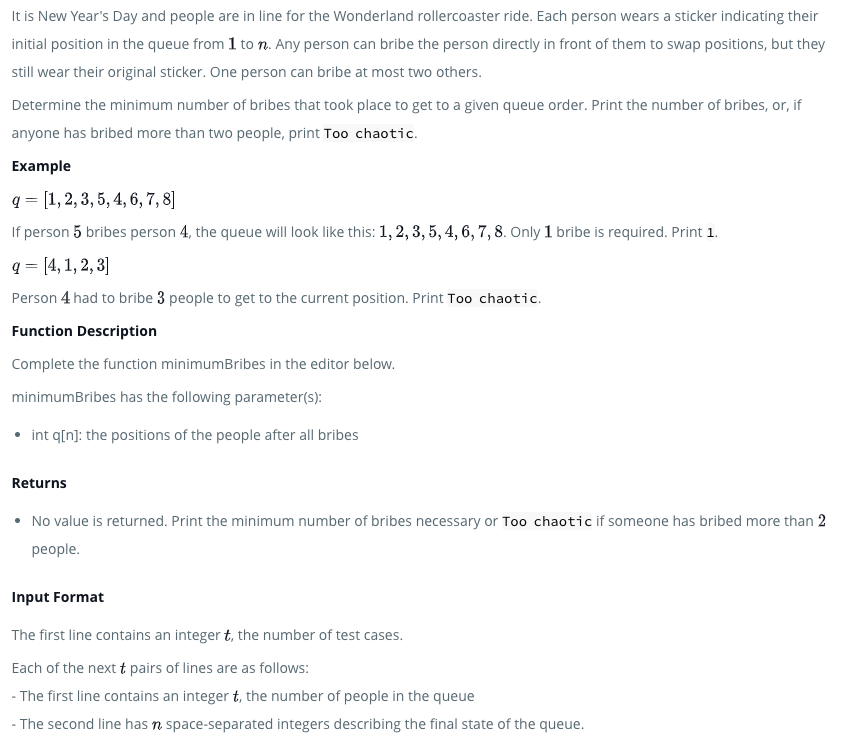

```python
#!/bin/python

import math
import os
import random
import re
import sys

# Complete the minimumBribes function below.
def minimumBribes(q):
    q_len = len(q) - 1
    bribes = 0
    swaped = False
    for index, value in enumerate(q):
        num_bribes = (value - 1) - index
        if num_bribes > 2:
            print 'Too chaotic'
            return
    for i in xrange(0, q_len):
        for j in xrange(0, q_len):
            if q[j] > q[j+1]:
                q[j], q[j+1] = q[j+1], q[j]
                bribes += 1
                swaped = True
        if swaped:
            swaped = False
        else:
            break
            
    print bribes       
            
if __name__ == '__main__':
    t = int(raw_input())

    for t_itr in xrange(t):
        n = int(raw_input())

        q = map(int, raw_input().rstrip().split())

        minimumBribes(q)
```


## Minimum Swaps 2

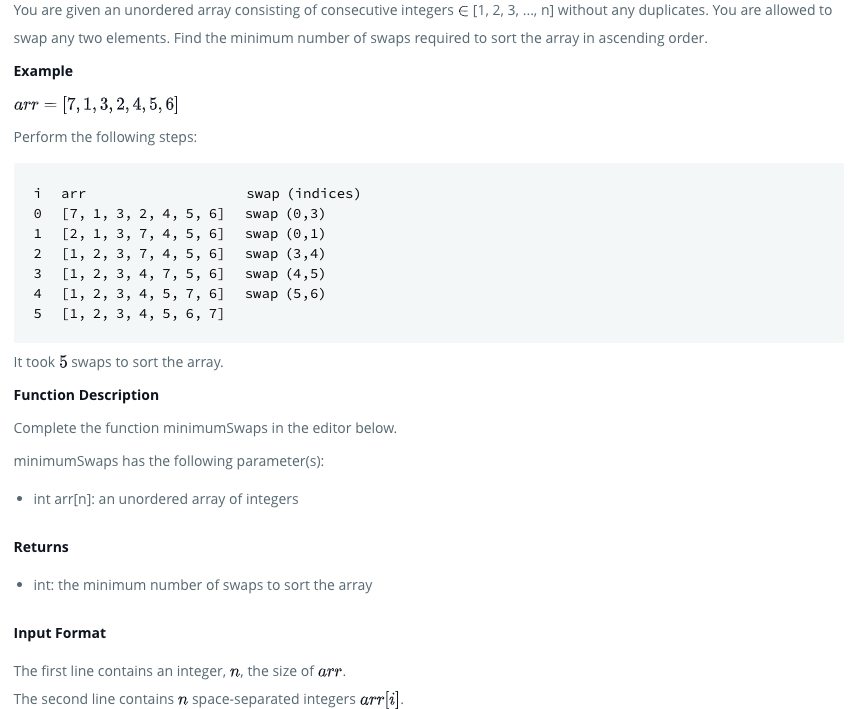

```python
#!/bin/python

import math
import os
import random
import re
import sys

# Complete the minimumSwaps function below.
def minimumSwaps(arr):
    swaps = 0
    arr_length = len(arr) - 1
    visited = []
    for i in range(arr_length):
        while(arr[i]!=i+1):
            key = arr[i]-1
            arr[i],arr[key]=arr[key],arr[i]
            swaps += 1 
            
    return swaps

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    n = int(raw_input())

    arr = map(int, raw_input().rstrip().split())

    res = minimumSwaps(arr)

    fptr.write(str(res) + '\n')

    fptr.close()
```

## Array Manipulation


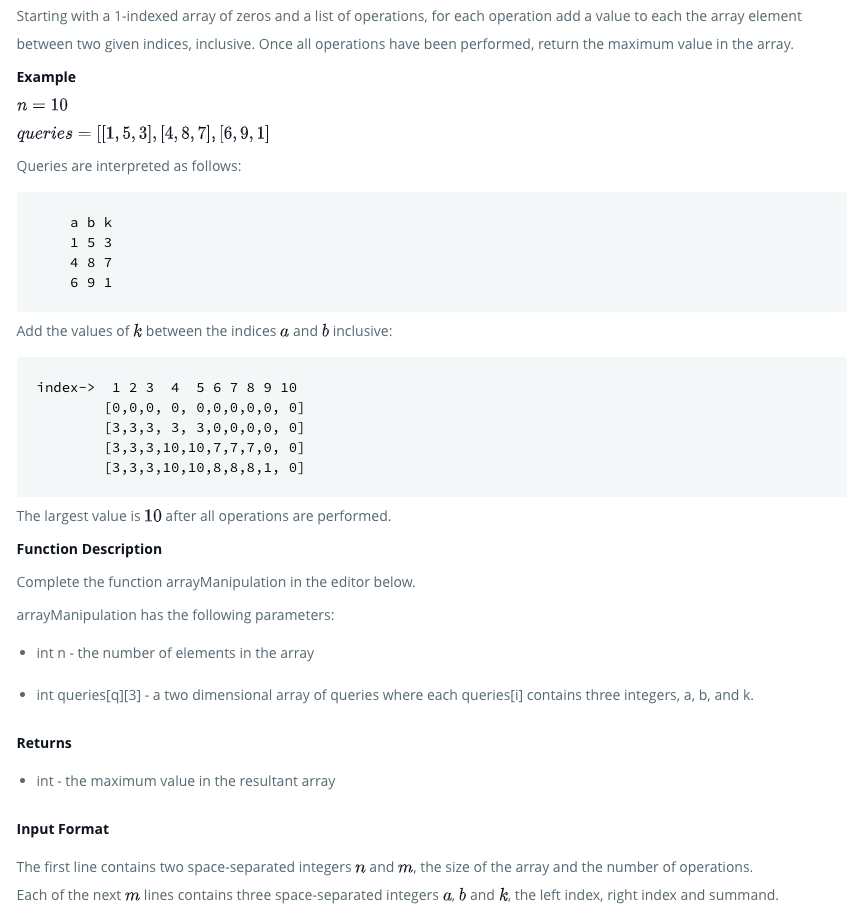

```python
#!/bin/python

import math
import os
import random
import re
import sys
from collections import defaultdict

# Complete the arrayManipulation function below.
def arrayManipulation(n, queries):
    # temp = defaultdict(long)
    # for query in queries:
    #     for i in xrange(query[0], query[1]+1):
    #         temp[i] += query[2]
    # return max(temp.values())
    
    my_array = [0] * (n+1)
    count = 0
    max_result = 0
    for first,last,value in queries:
        my_array[first-1] += value
        my_array[last] -= value
    for item in my_array:
        count += item
        if count > max_result:
            max_result = count
       
    return max_result
        

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    nm = raw_input().split()

    n = int(nm[0])

    m = int(nm[1])

    queries = []

    for _ in xrange(m):
        queries.append(map(int, raw_input().rstrip().split()))

    result = arrayManipulation(n, queries)

    fptr.write(str(result) + '\n')

    fptr.close()
```

# Dictionaries and Hashmaps

## Hash Tables: Ransom Note

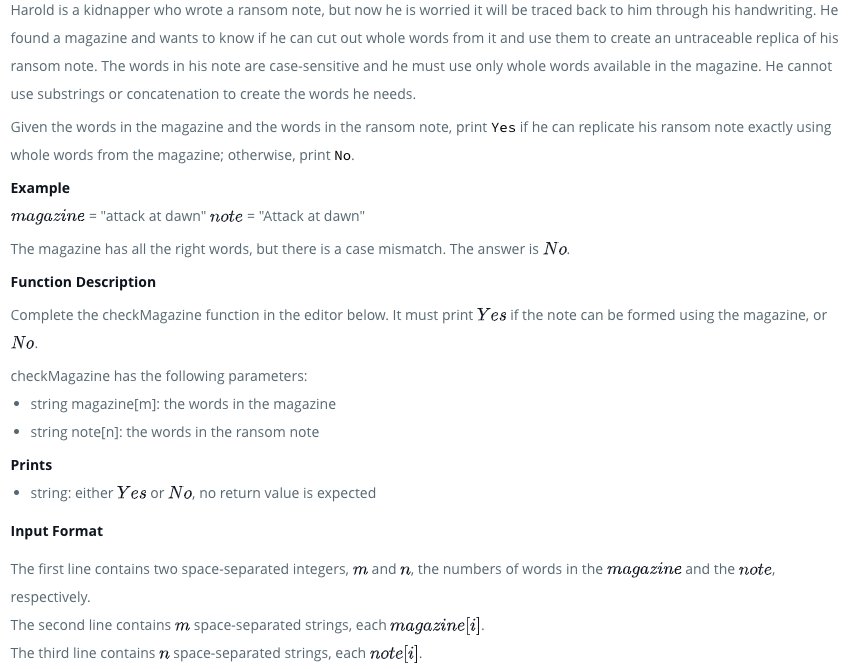

```python
#!/bin/python

import math
import os
import random
import re
import sys
from collections import Counter

# Complete the checkMagazine function below.
def checkMagazine(magazine, note):
    print('Yes') if (Counter(note) - Counter(magazine)) == {} else print('No')
    
if __name__ == '__main__':
    mn = raw_input().split()

    m = int(mn[0])

    n = int(mn[1])

    magazine = raw_input().rstrip().split()

    note = raw_input().rstrip().split()

    checkMagazine(magazine, note)
```



## Two Strings


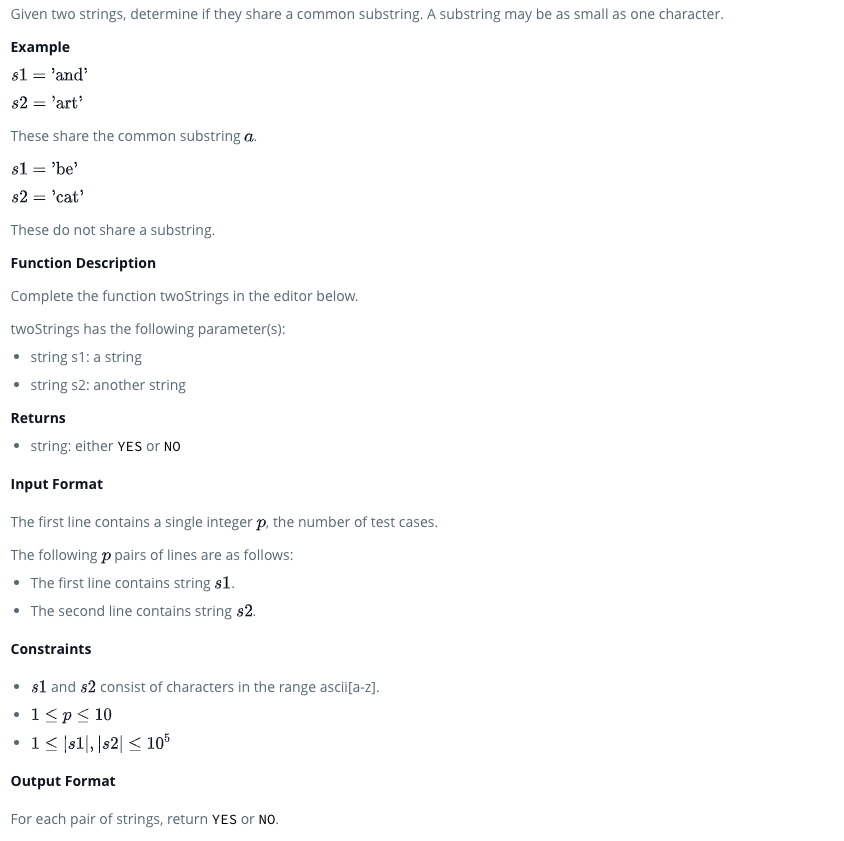

```python
#!/bin/python

import math
import os
import random
import re
import sys
from collections import Counter

# Complete the twoStrings function below.
def twoStrings(s1, s2):
    c_s1 = Counter(s1)
    c_s2 = Counter(s2)
    for item in c_s1.keys():
        if item in c_s2.keys():
            return 'YES'
    return 'NO'

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    q = int(raw_input())

    for q_itr in xrange(q):
        s1 = raw_input()

        s2 = raw_input()

        result = twoStrings(s1, s2)

        fptr.write(result + '\n')

    fptr.close()
```
```python
def twoStrings(s1, s2):
    # create sets of unique characters
    # and test for intersection
    if set(s1)&set(s2):
        return "YES"
    else:
        return "NO"
```
```java
import java.util.*;

public class Solution {
    static Set<Character> a;
    static Set<Character> b;

    public static void main(String[] args) {
        Scanner scan = new Scanner(System.in);
        int n = scan.nextInt();
        for(int i = 0; i < n; i++) {
            a = new HashSet<Character>();
            b = new HashSet<Character>();
            
            //creating the set of string1
            for(char c : scan.next().toCharArray()) {
                a.add(c);
            }
            //creating the set of string2
            for(char c : scan.next().toCharArray()) {
                b.add(c);
            }
            
            // store the set intersection in set 'a'
            a.retainAll(b);
            
            System.out.println( (a.isEmpty()) ? "NO" : "YES" );
        }
        scan.close();
    }
}
```

## Sherlock and Anagrams

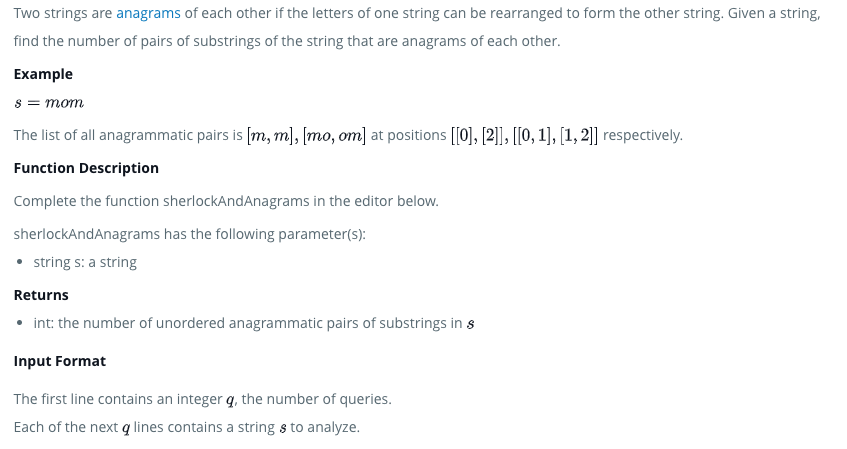

```python
#!/bin/python

import math
import os
import random
import re
import sys
from collections import Counter

# Complete the sherlockAndAnagrams function below.
def sherlockAndAnagrams(s):
    all_poss = {}
    for i in range(len(s)):
        for j in range(1, len(s)-i+1):
            substrings = ["".join(sorted(s[i:i+j]))]
            key = tuple(Counter(substrings).items())
            # key = frozenset(Counter(s[i:i+j]).items())
            all_poss[key] = all_poss.get(key, 0) + 1
    # print all_poss
    count = 0
    for key in all_poss:
        count += all_poss[key] * (all_poss[key]-1) // 2
    return count
    
if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    q = int(raw_input())

    for q_itr in xrange(q):
        s = raw_input()

        result = sherlockAndAnagrams(s)

        fptr.write(str(result) + '\n')

    fptr.close()
```


## Count Triplets

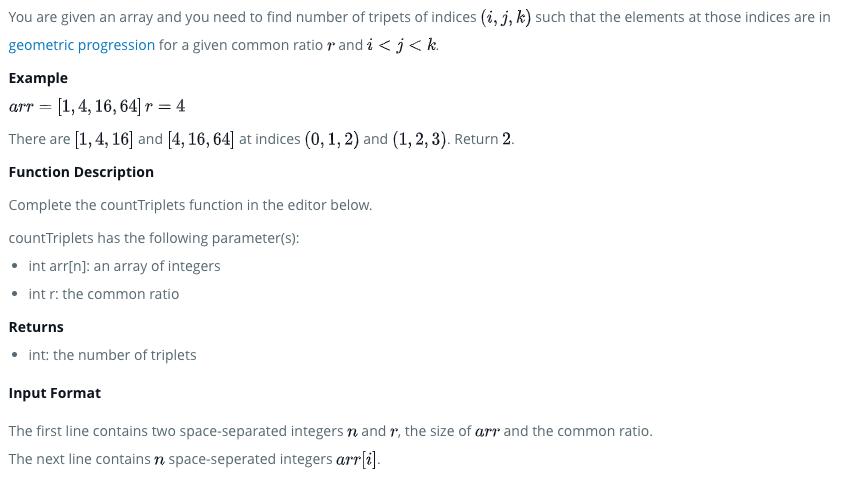

```python
#!/bin/python

import math
import os
import random
import re
import sys
from collections import Counter

# Complete the countTriplets function below.
def countTriplets(arr, r):
    r2 = Counter()
    r3 = Counter()
    count = 0
    
    for v in arr:
        if v in r3:
            count += r3[v]
        
        if v in r2:
            r3[v*r] += r2[v]
        
        r2[v*r] += 1
    return count
        
        
    

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    nr = raw_input().rstrip().split()

    n = int(nr[0])

    r = int(nr[1])

    arr = map(long, raw_input().rstrip().split())

    ans = countTriplets(arr, r)

    fptr.write(str(ans) + '\n')

    fptr.close()
```


## Frequency Queries

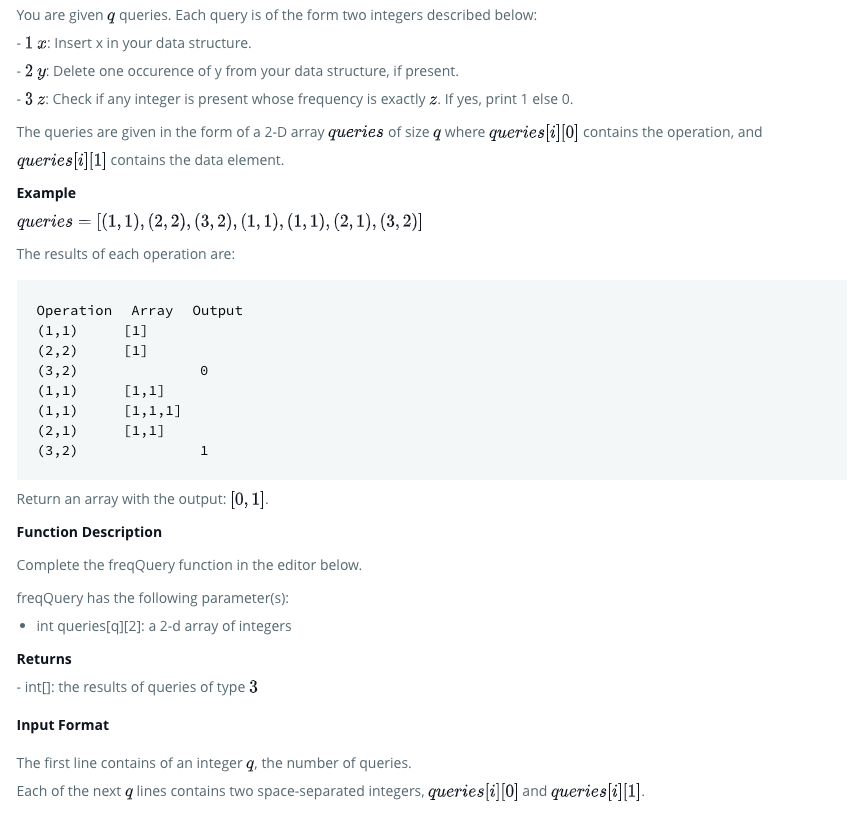

```python
#!/bin/python

import math
import os
import random
import re
import sys
from collections import Counter

# Complete the freqQuery function below.
def freqQuery(queries):
    result = Counter()
    cont = Counter()
    answer = []
    for query in queries:
        operation = query[0]
        value = query[1]
        if operation == 1:
            cont[result[value]] -= 1
            result[value] +=1
            cont[result[value]] += 1
        elif operation == 2:
            if result[value] > 0:
                cont[result[value]] -= 1
                result[value] -= 1
                cont[result[value]] += 1
        elif operation == 3:
            if cont[value]>0:
                answer.append(1)
            else:
                answer.append(0)
    print result
    return answer

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    q = int(raw_input().strip())

    queries = []

    for _ in xrange(q):
        queries.append(map(int, raw_input().rstrip().split()))

    ans = freqQuery(queries)

    fptr.write('\n'.join(map(str, ans)))
    fptr.write('\n')

    fptr.close()
```

# String Manipulation

## Strings: Making Anagrams

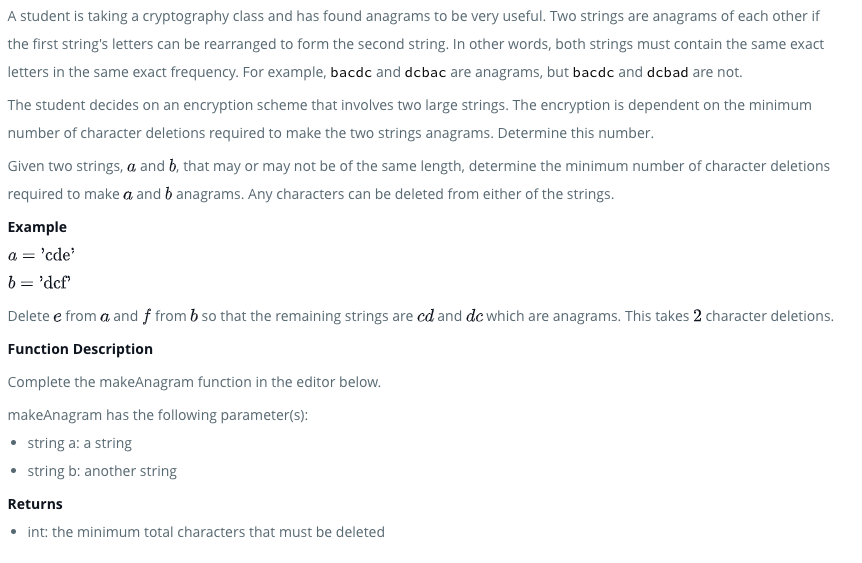

```python
#!/bin/python

import math
import os
import random
import re
import sys

# Complete the makeAnagram function below.
def makeAnagram(a, b):
    a, b = list(a), list(b)
    a_val = list(a)
    for i in a_val:
        if i in b:
            a.remove(i)
            b.remove(i)
    return len(a) + len(b)

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    a = raw_input()

    b = raw_input()

    res = makeAnagram(a, b)

    fptr.write(str(res) + '\n')

    fptr.close()
```


## Alternating Characters

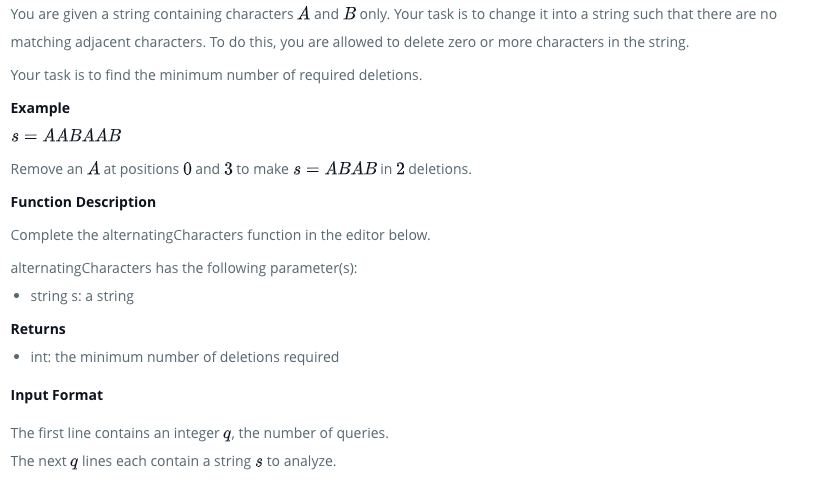

```python
#!/bin/python

import math
import os
import random
import re
import sys

# Complete the alternatingCharacters function below.
def alternatingCharacters(s):
    delete = 0
    for idx, value in enumerate(s):
        if idx < len(s) -1 and s[idx] == s[idx+1]:
            delete += 1
    return delete      
        
        

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    q = int(raw_input())

    for q_itr in xrange(q):
        s = raw_input()

        result = alternatingCharacters(s)

        fptr.write(str(result) + '\n')

    fptr.close()
```


## Sherlock and the Valid String

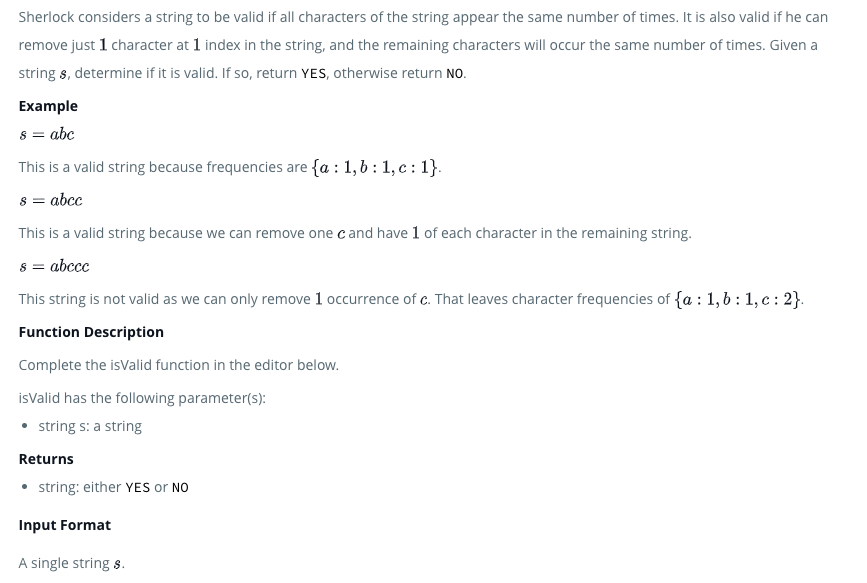


```python
#!/bin/python

import math
import os
import random
import re
import sys
from collections import Counter

# Complete the isValid function below.
def isValid(s):
    result = ''
    s1 = Counter(s)
    
    temp = list(s1.values())
    max_s1 = max(temp)
    min_s1 = min(temp)
    if max_s1 == min_s1:
        return 'YES'
    elif max_s1 - min_s1 == 1 and temp.count(max_s1) == 1:
        return 'YES'
    elif min_s1 == 1 and temp.count(min_s1) == 1 and len(set(temp)) == 2:
        return 'YES'
    else:
        return 'NO'
    

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    s = raw_input()

    result = isValid(s)

    fptr.write(result + '\n')

    fptr.close()
```


## Special String Again

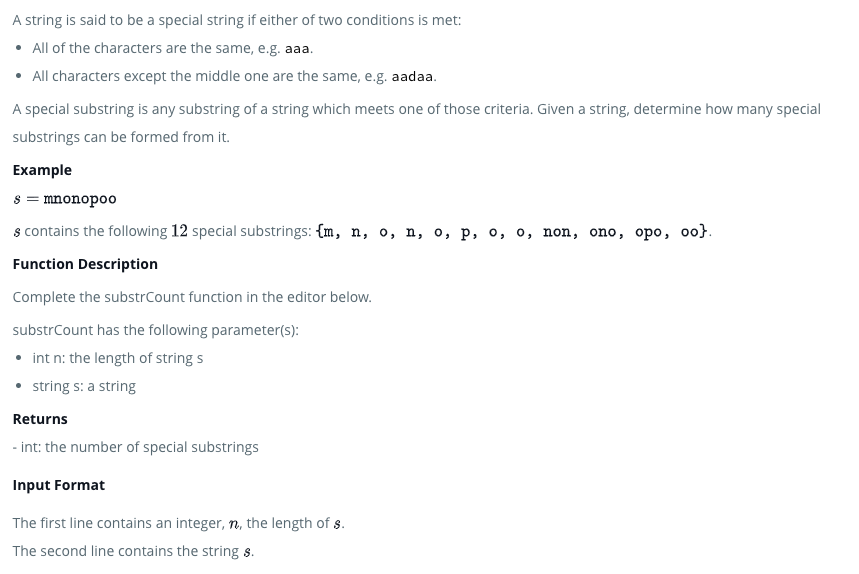

```python
#!/bin/python

import math
import os
import random
import re
import sys

# Complete the substrCount function below.
def substrCount(n, s):
    total = n
    prev = None
    start = 0
    for i, v in enumerate(s):
        if i == 0:
            prev = v
        elif v == prev:
            total += i - start
        else:
            for j in xrange(1, i - start + 1):
                if  i - j >= 0 and i+j < len(s) and s[i-j] == s[i+j]:
                    total +=1
                else:
                    break
            prev = v
            start = i
    return total

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    n = int(raw_input())

    s = raw_input()

    result = substrCount(n, s)

    fptr.write(str(result) + '\n')

    fptr.close()
```


## Common Child

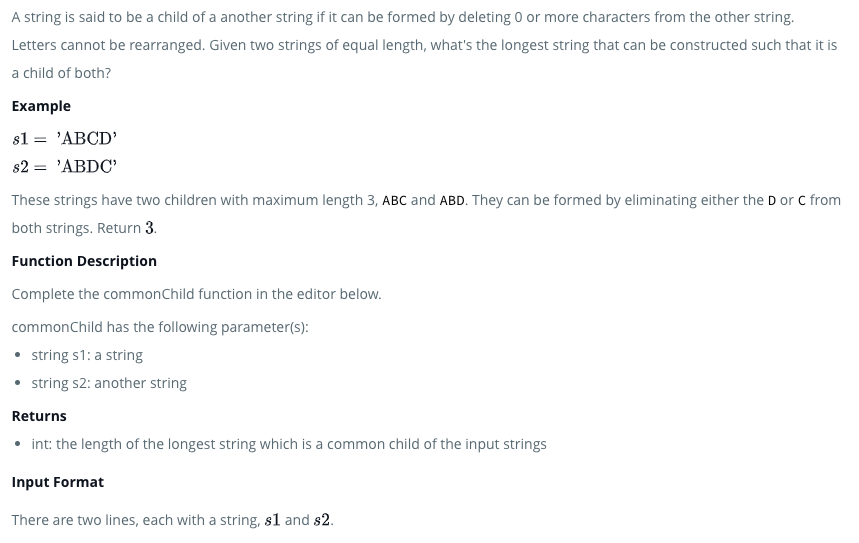

```python
#!/bin/python

import math
import os
import random
import re
import sys
from collections import Counter

# Complete the commonChild function below.
def commonChild(s1, s2):
    
    m = len(s1)
    n = len(s2)
    matrix = [[0]*(n+1) for i in xrange(m+1)]
    for i in xrange(0,m):
        for j in xrange(0,n):
            if(s1[i]==s2[j]):
                matrix[i+1][j+1] = matrix[i][j]+1
            else:
                matrix[i+1][j+1] = max(matrix[i+1][j],matrix[i][j+1])
    
    return matrix[m][n]


if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    s1 = raw_input()

    s2 = raw_input()

    result = commonChild(s1, s2)

    fptr.write(str(result) + '\n')

    fptr.close()
```

# Graph

## Roads and Libraries

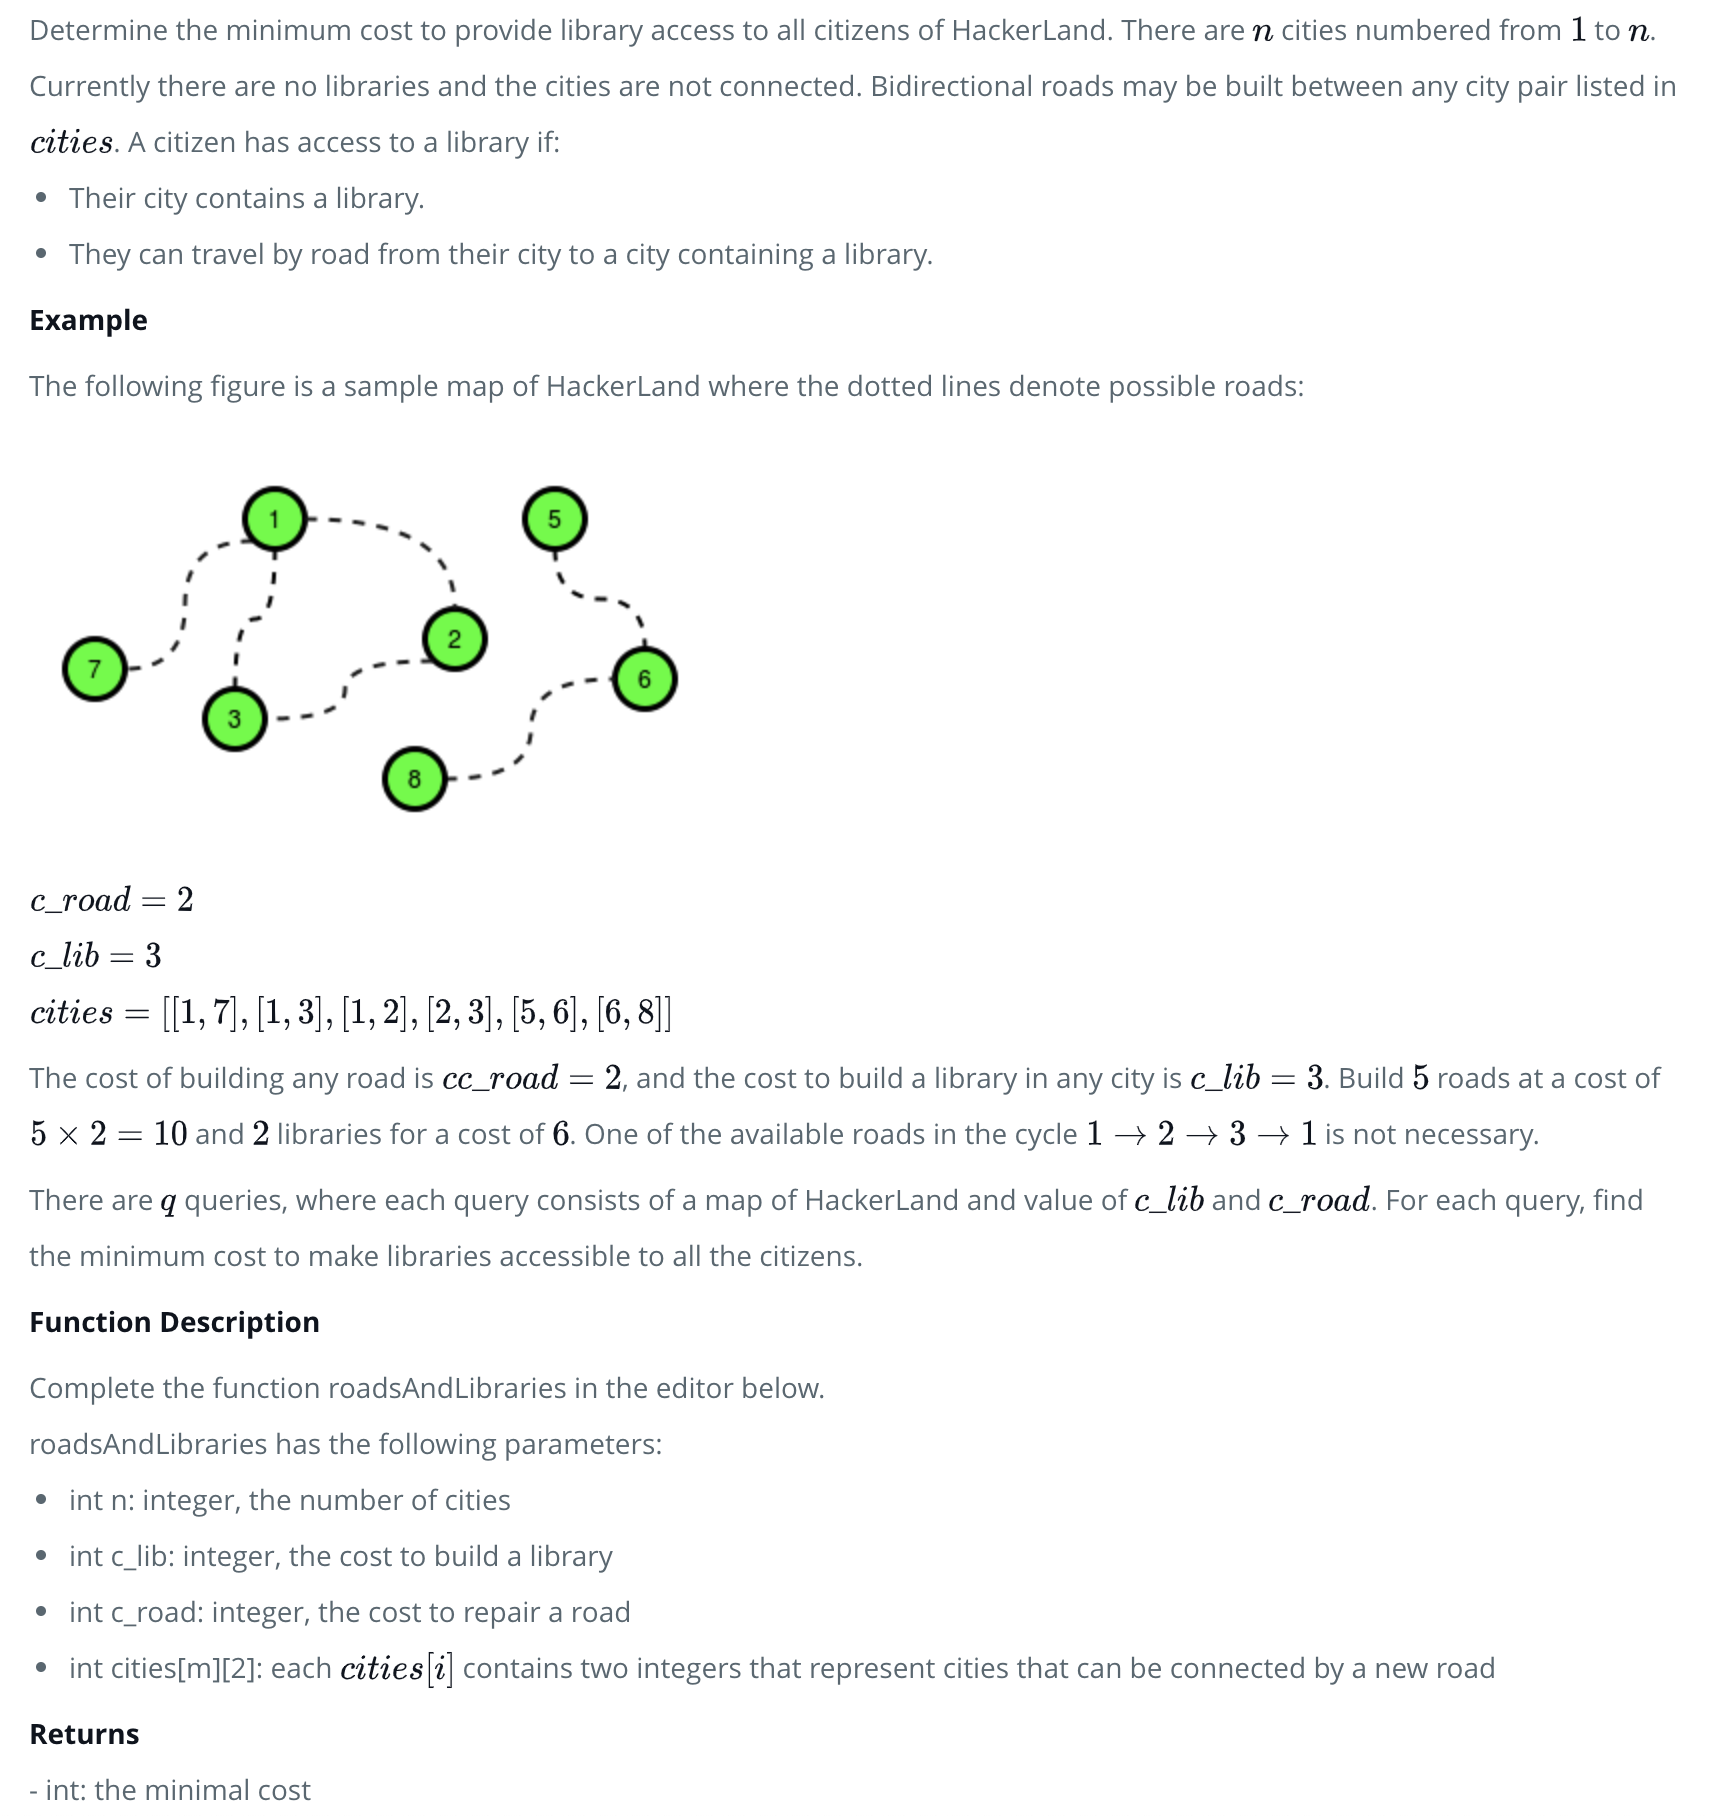

```python
#!/bin/python

import math
import os
import random
import re
import sys
# def dfs(alist, s, visited, cost):
#     visited[s]=1;l=len(alist[s]);
#     if(l!=0):
#         for i in xrange(l):
#             if(visited[alist[s][i]]==0):
#                 cost.append(c_road)
#                 dfs(alist, alist[s][i], visited, cost)

# # Complete the roadsAndLibraries function below.
# def roadsAndLibraries(n, c_lib, c_road, cities):
#     m = len(cities)
#     valCount=0
#     road = []
#     visited=[0 for i in xrange(n+1)];alist=[[] for i in xrange(n+1)]
#     for a1 in cities:                                            
#         city_1, city_2 = map(int,a1)
#         alist[city_1].append(city_2);alist[city_2].append(city_1)
#     if (m==0 or c_road>=c_lib):
#         return n*c_lib
#     else:
#         cost = []
#         for i in xrange(1, n+1):
#             if (visited[i]==0):
#                 dfs(alist, i, visited, cost)
#                 cost.append(c_lib)
        
#         return sum(cost)
class DisjoinSet():
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0]*n
        self.edges = 0
        self._subgroups = n

    def find(self, x):
        if x != self.parent[x]:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        xroot = self.find(x)
        yroot = self.find(y)

        if xroot == yroot:
            return

        self.edges += 1
        self._subgroups -= 1

        if self.rank[xroot] > self.rank[yroot]:
            self.parent[yroot] = xroot
        elif self.rank[xroot] < self.rank[yroot]:
            self.parent[xroot] = yroot
        else:
            self.parent[yroot] = xroot
            self.rank[xroot] += 1

    def num_edges(self):
        return self.edges

    def num_subgroups(self):
        return self._subgroups - 1

def roadsAndLibraries(n, c_lib, c_road, cities):
    # Complete this function
    ds = DisjoinSet(n+1)
    i = 0
    for i in range(len(cities)):
        ds.union(cities[i][0], cities[i][1])
        i += 1
    
    if c_lib < c_road:
        return c_lib*n
    
    return ds.num_edges()*c_road + ds.num_subgroups()*c_lib

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    q = int(raw_input())

    for q_itr in xrange(q):
        nmC_libC_road = raw_input().split()

        n = int(nmC_libC_road[0])

        m = int(nmC_libC_road[1])

        c_lib = int(nmC_libC_road[2])

        c_road = int(nmC_libC_road[3])

        cities = []

        for _ in xrange(m):
            cities.append(map(int, raw_input().rstrip().split()))

        result = roadsAndLibraries(n, c_lib, c_road, cities)

        fptr.write(str(result) + '\n')

    fptr.close()
```

## Find the nearest clone

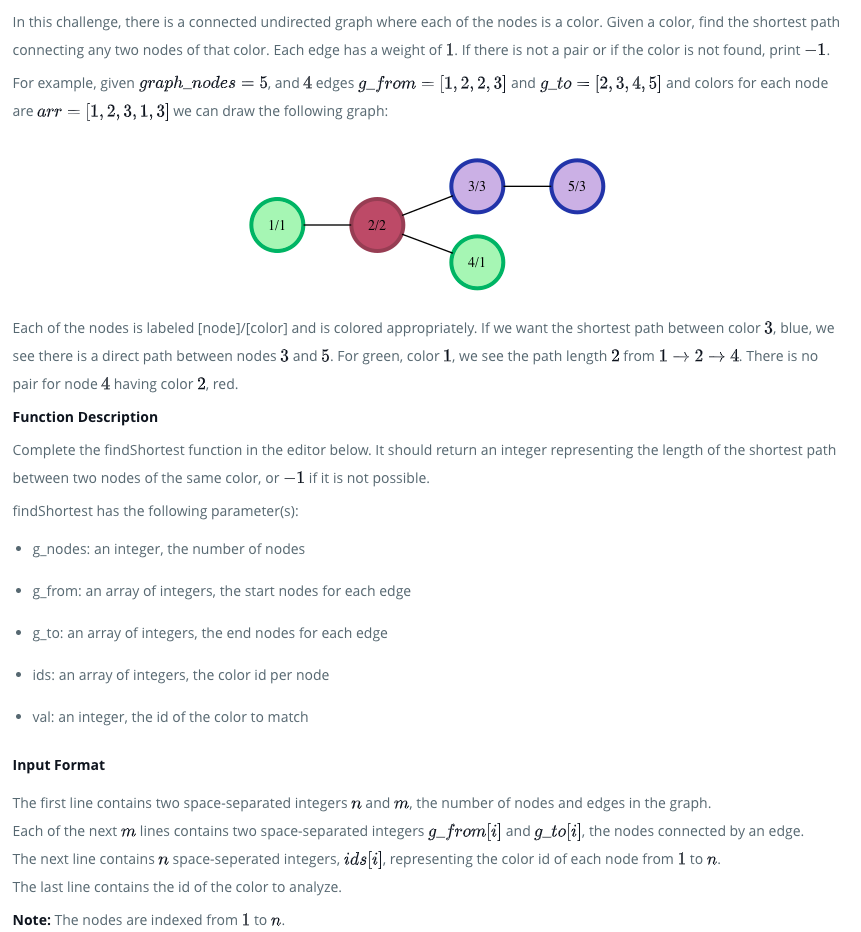

```python
#!/bin/python3

import math
import os
import random
import re
import sys

# Complete the findShortest function below.

#
# For the weighted graph, <name>:
#
# 1. The number of nodes is <name>_nodes.
# 2. The number of edges is <name>_edges.
# 3. An edge exists between <name>_from[i] to <name>_to[i].
#
#
# def findShortest(graph_nodes, graph_from, graph_to, ids, val):
    # solve here

from collections import defaultdict
import queue

class Graph:
    def __init__(self):
        self.edge_map = defaultdict(set)
    
    def connect(self, from_, to_):
        self.edge_map[from_].add(to_)
        self.edge_map[to_].add(from_)
    
    def shortest_path_from(self, start_node, cond):
        visited = set()
        q = queue.Queue()
        q.put([start_node, 0])
        visited.add(start_node)
        
        while not q.empty():
            source, dist = q.get()
            
            for neighbor in self.edge_map[source]:
                if not neighbor in visited:
                    if cond(neighbor): return dist+1

                    q.put([neighbor, dist+1])
                    visited.add(neighbor)

        return -1

def add_edges(graph, graph_from, graph_to):
    for i in range(len(graph_from)):
        from_ = graph_from[i]
        to_ = graph_to[i]
        graph.connect(from_, to_)

def findShortest(graph_nodes, graph_from, graph_to, ids, val):
    color_to_match = ids[val-1]
    
    g = Graph()
    add_edges(g, graph_from, graph_to)
    return g.shortest_path_from(val, lambda node: ids[node-1] == color_to_match)

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    graph_nodes, graph_edges = map(int, input().split())

    graph_from = [0] * graph_edges
    graph_to = [0] * graph_edges

    for i in range(graph_edges):
        graph_from[i], graph_to[i] = map(int, input().split())

    ids = list(map(int, input().rstrip().split()))

    val = int(input())

    ans = findShortest(graph_nodes, graph_from, graph_to, ids, val)

    fptr.write(str(ans) + '\n')

    fptr.close()
```

## BFS: Shortest Reach in a Graph

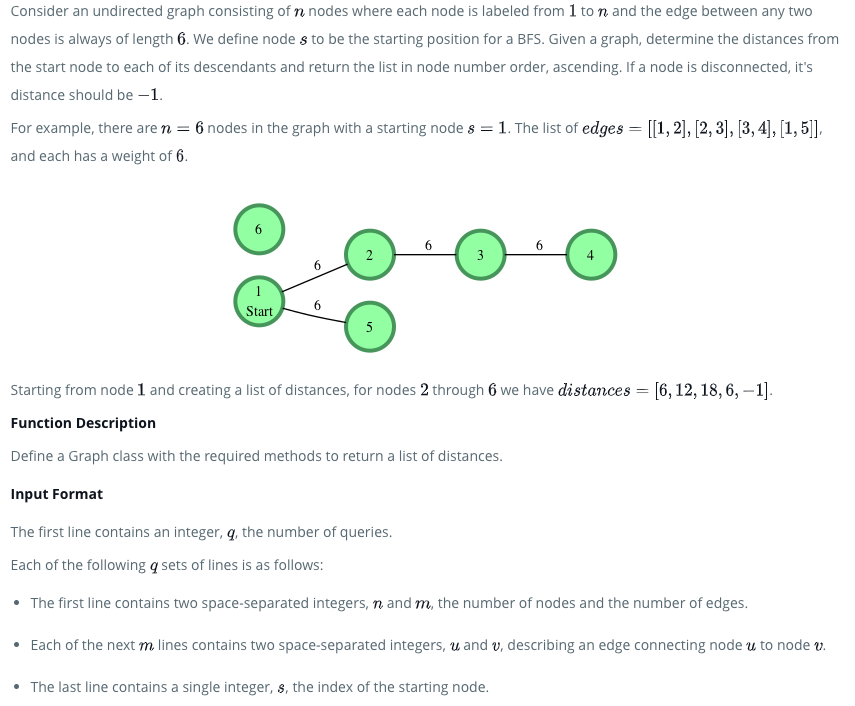

```python
from collections import defaultdict
import Queue

class Graph(object):
    def __init__(self, n):
        self.connection = defaultdict(list)
        self.num_of_nodes = n

    def connect(self, x, y):
        self.connection[x].append(y)
        self.connection[y].append(x)

    def find_all_distances(self, root):
        distances = [-1 for i in xrange(self.num_of_nodes)]
        unvisited = set([i for i in range(self.num_of_nodes)])
        q = Queue.Queue()

        distances[root] = 0
        unvisited.remove(root)
        q.put(root)
        
        while not q.empty():
            node = q.get()
            children = self.connection[node]
            height = distances[node]
            for child in children:
                if child in unvisited:
                    distances[child] = height + 6
                    unvisited.remove(child)
                    q.put(child)
        
        distances.pop(root)
        print(" ".join(map(str,distances)))

        

t = input()
for i in range(t):
    n,m = [int(x) for x in raw_input().split()]
    graph = Graph(n)
    for i in xrange(m):
        x,y = [int(x) for x in raw_input().split()]
        graph.connect(x-1,y-1) 
    s = input()
    graph.find_all_distances(s-1)

```

## DFS: Connected Cell in a Grid

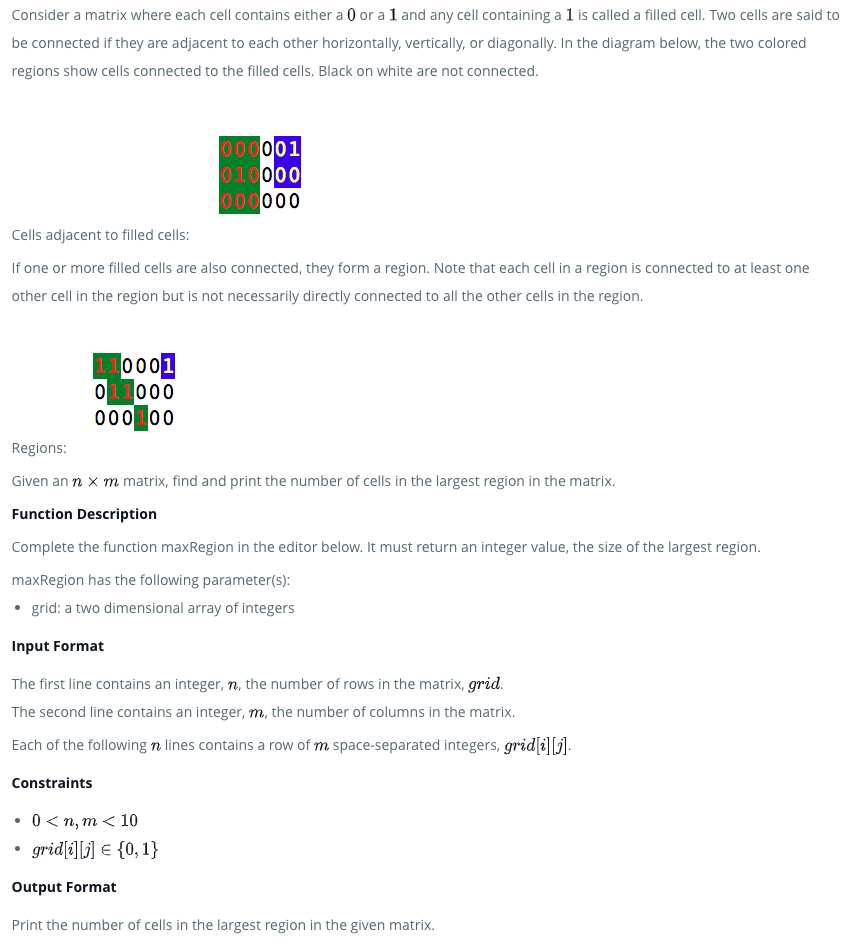

```python
#!/bin/python

import math
import os
import random
import re
import sys

# Complete the maxRegion function below.
def maxRegion(grid):
    result = 0
    grid_r = len(grid)
    grid_c = len(grid[0])
    for i in xrange(grid_r):
        for j in xrange(grid_c):
            result = max(result, countCells(grid, i, j))
    return result
    
def countCells(grid, i, j):
    if not(i in range(len(grid)) and j in range(len(grid[0]))):
        return 0
    if grid[i][j] == 0:
        return 0
    count = 1
    grid[i][j] = 0
    count += countCells(grid, i + 1, j)
    count += countCells(grid, i - 1, j)
    count += countCells(grid, i, j + 1)
    count += countCells(grid, i, j - 1)
    count += countCells(grid, i + 1, j + 1)
    count += countCells(grid, i - 1, j - 1)
    count += countCells(grid, i - 1, j + 1)
    count += countCells(grid, i + 1, j - 1)
    return int(count)

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    n = int(raw_input())

    m = int(raw_input())

    grid = []

    for _ in xrange(n):
        grid.append(map(int, raw_input().rstrip().split()))

    res = maxRegion(grid)

    fptr.write(str(res) + '\n')

    fptr.close()
```


# Trees

## Tree: Height of a Binary Tree

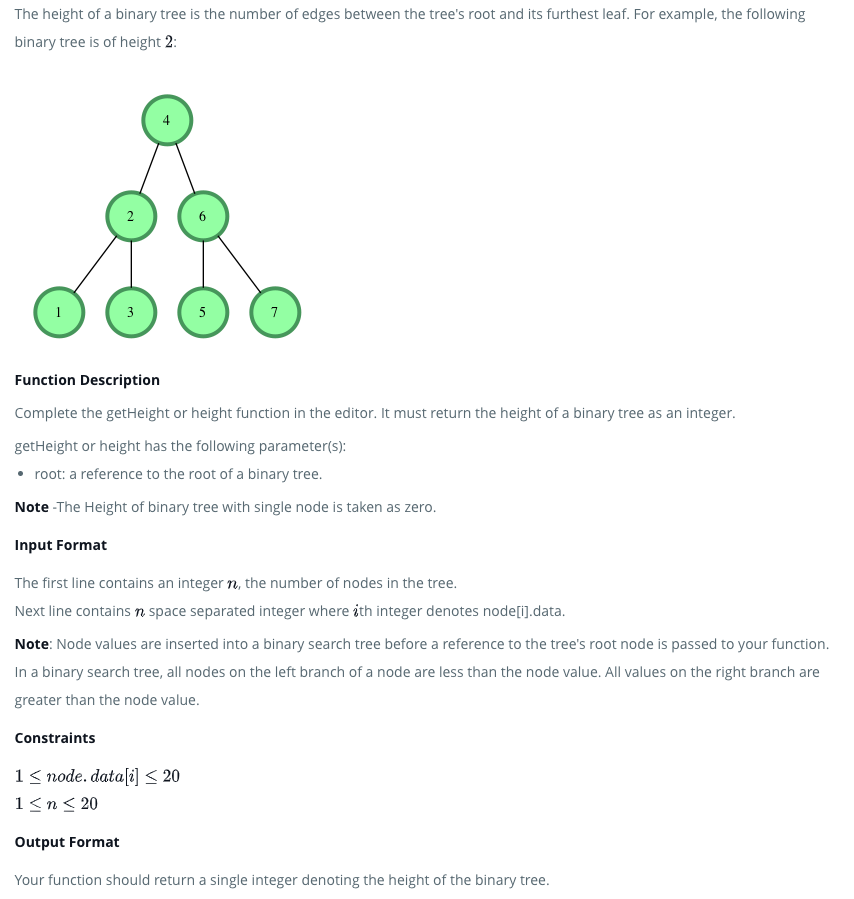

```python


# Enter your code here. Read input from STDIN. Print output to STDOUT
'''
class Node:
      def __init__(self,info): 
          self.info = info  
          self.left = None  
          self.right = None 
           

       // this is a node of the tree , which contains info as data, left , right
'''
def height(root):
    if root:
        return 1 + max(height(root.left), height(root.right))
    else:
        return -1 
```

# Binary Search Tree : Lowest Common Ancestor

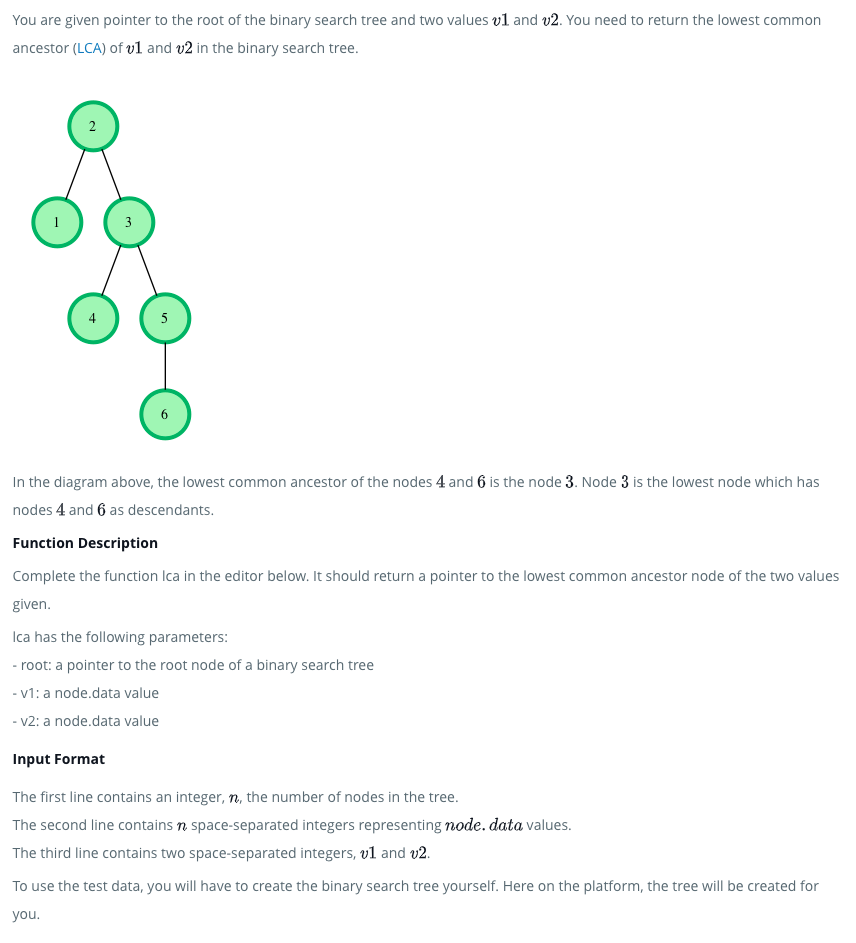

```python


# Enter your code here. Read input from STDIN. Print output to STDOUT
'''
class Node:
      def __init__(self,info): 
          self.info = info  
          self.left = None  
          self.right = None 
           

       // this is a node of the tree , which contains info as data, left , right
'''

def lca(root, v1, v2):
    #Enter your code here
    if (root.info < v1 and root.info < v2):
        return lca(root.right, v1, v2)
    if (root.info > v1 and root.info > v2):
        return lca(root.left, v1, v2)
    return root

```

## Trees: Is This a Binary Search Tree?

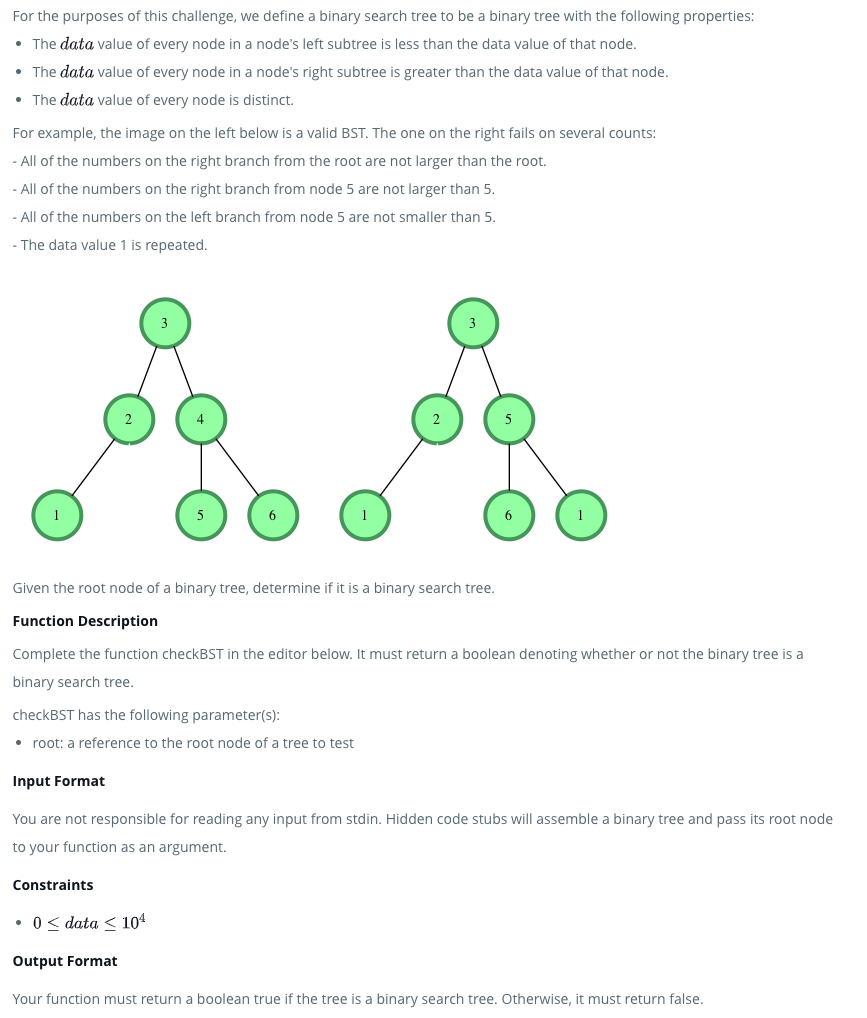

```python
""" Node is defined as
class node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
"""

lastValue = [None]

def checkBST(root):
    if not root:
        return True
    left = checkBST(root.left)
    if root.data <= lastValue[0]:
        return False
    lastValue[0] = root.data
    
    right = checkBST(root.right)
    return left and right
```


## Tree: Huffman Decoding

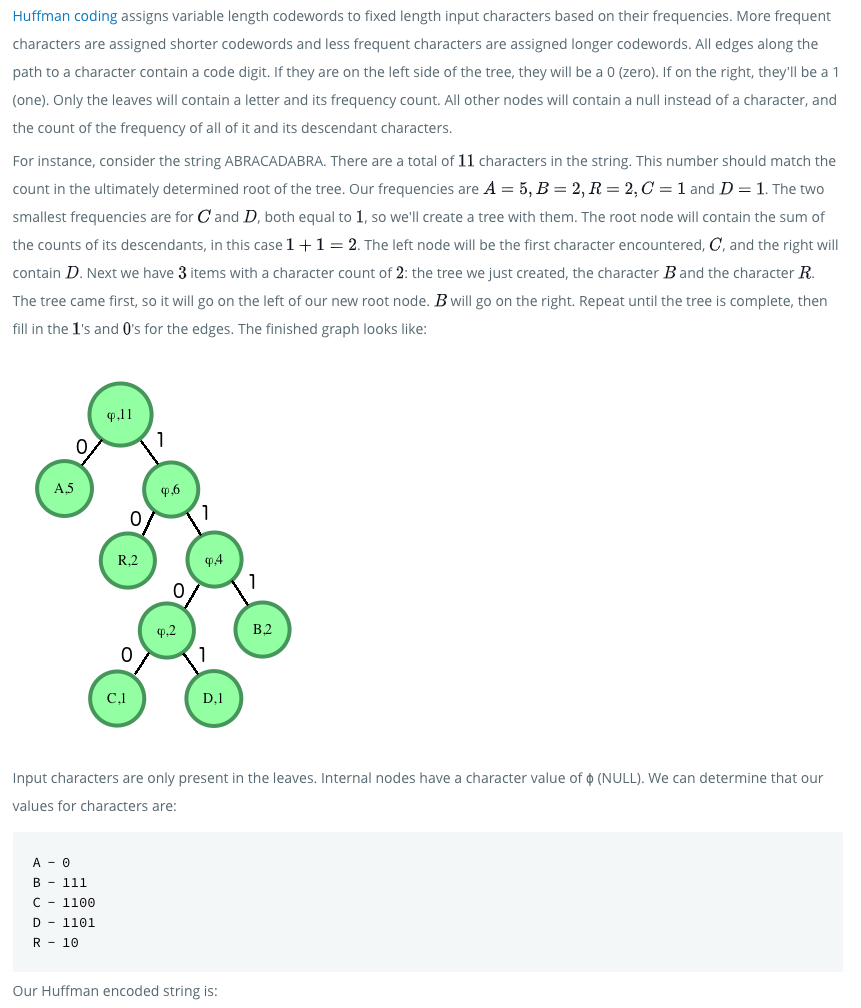


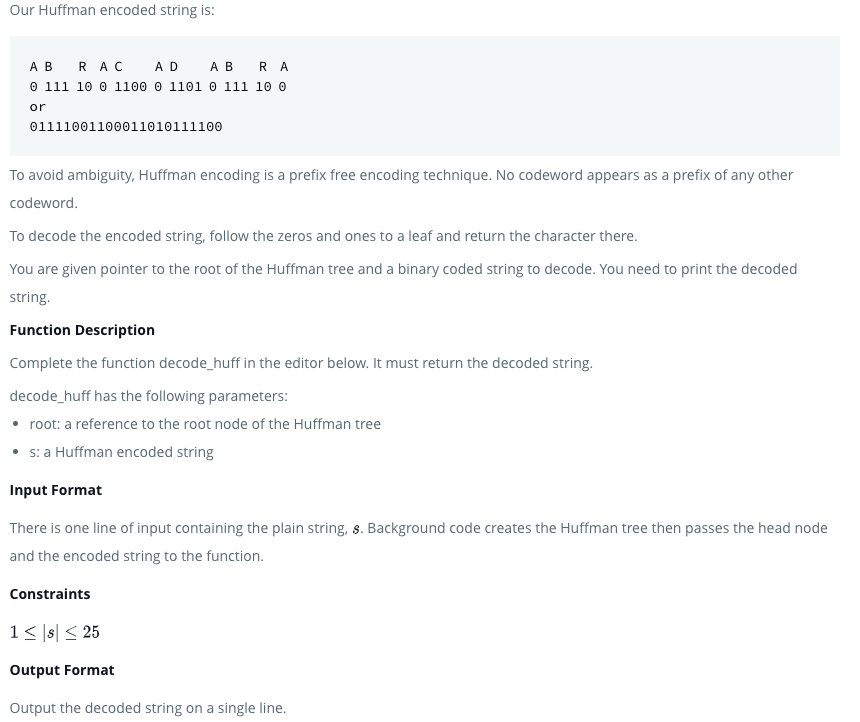

```python


"""class Node:
    def __init__(self, freq,data):
        self.freq= freq
        self.data=data
        self.left = None
        self.right = None
"""        

# Enter your code here. Read input from STDIN. Print output to STDOUT
def decodeHuff(root, s):
	#Enter Your Code Here
    result = []
    c = root
    for i, v in enumerate(s):
        if v == '0':
            c = c.left
        if v == '1':
            c = c.right
        if c.right==None and c.left==None:
            result.append(c.data)
            c=root
    print ''.join(result)



```

# Linked Lists

## Insert a node at a specific position in a linked list

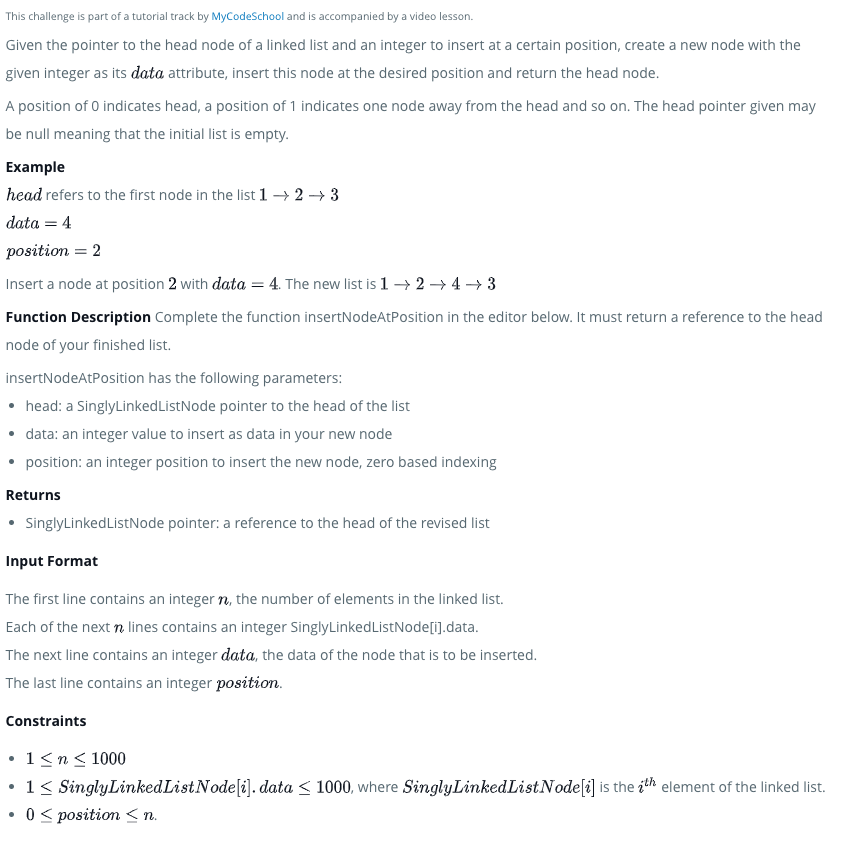

```python
def insertNodeAtPosition(head, data, position):
    current = head
    if not head:
        head = SinglyLinkedListNode(data)
        return head

    for _ in range(position-1):
        current = current.next

    new_node = SinglyLinkedListNode(data)
    new_node.next = current.next
    current.next = new_node
    return head
```


## Inserting a Node Into a Sorted Doubly Linked List

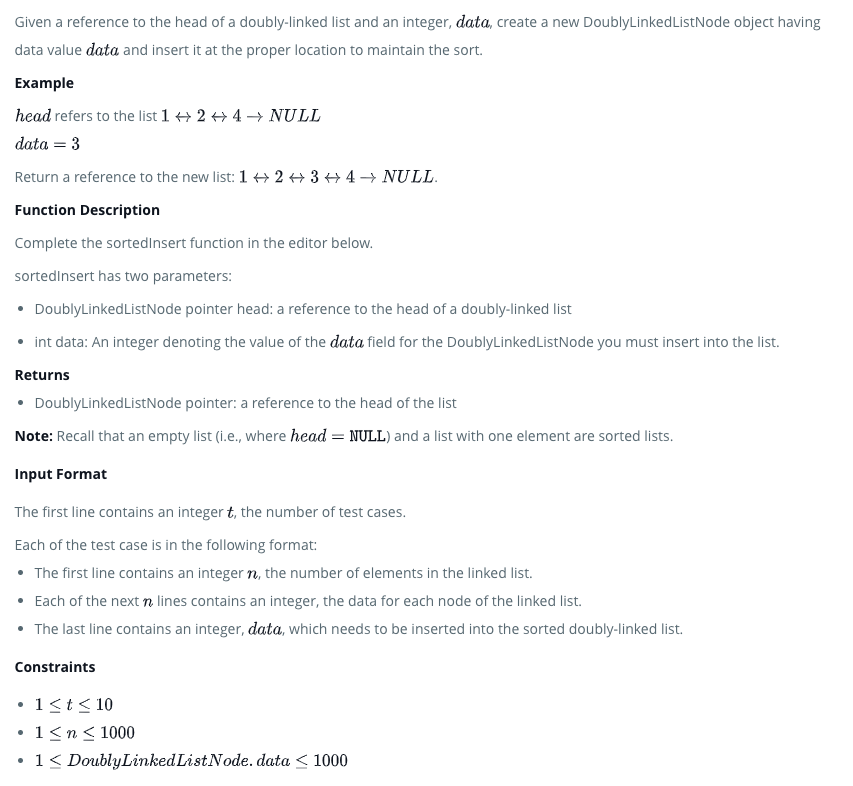

```python
# Complete the sortedInsert function below.

#
# For your reference:
#
# DoublyLinkedListNode:
#     int data
#     DoublyLinkedListNode next
#     DoublyLinkedListNode prev
#
#
def sortedInsert(head, data):
    node = DoublyLinkedListNode(data)
    if (head == None):
        return node
    elif (data < head.data):
        node.next = head
        head.prev = node
        return node
    else:
        node = sortedInsert(head.next, data)
        head.next = node 
        node.prev = head
        return head
```


## Reverse a doubly linked list

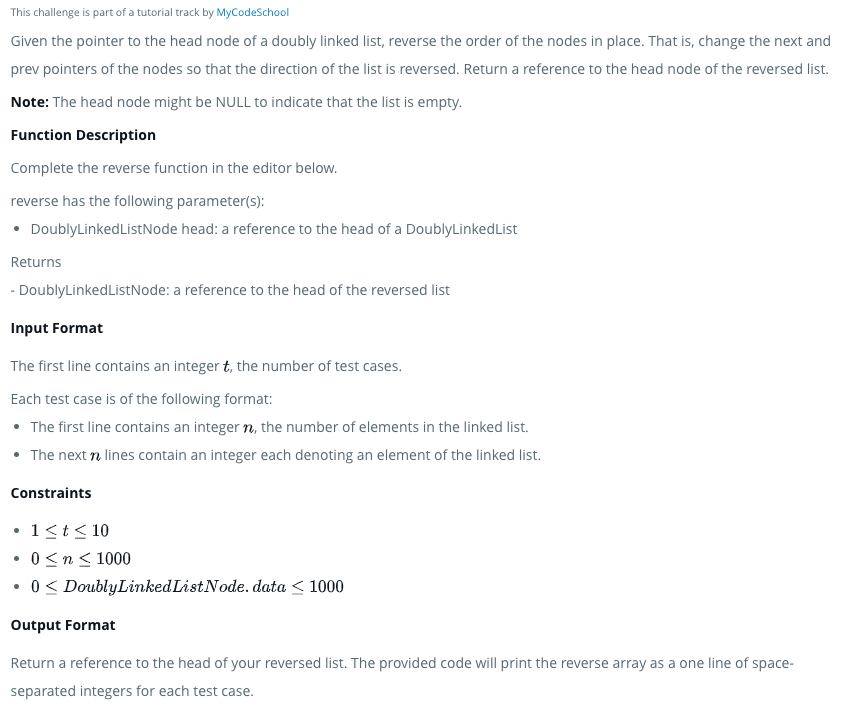

```python
#
# For your reference:
#
# DoublyLinkedListNode:
#     int data
#     DoublyLinkedListNode next
#     DoublyLinkedListNode prev
#
#
def reverse(head):
    current = head
    new_head = head
    while current:
        prev = current.prev;
        current.prev = current.next
        current.next = prev
        new_head = current
        current = current.prev
    return new_head
```

## Find Merge Point of Two Lists

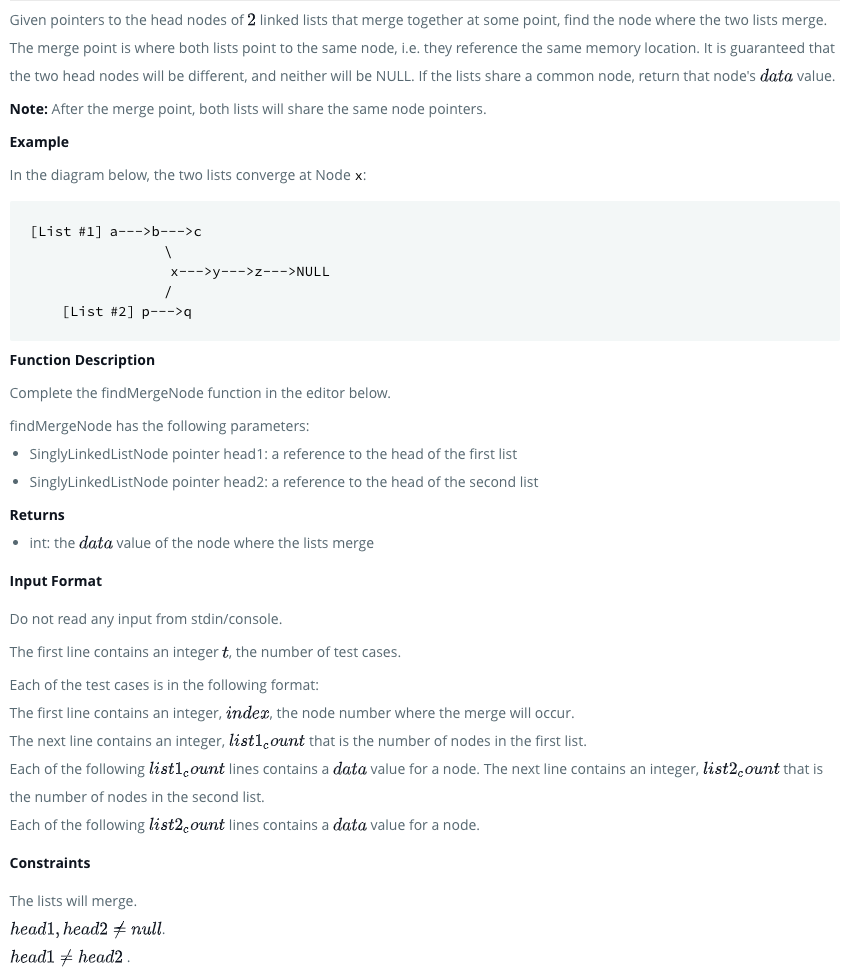

```java
    // Complete the findMergeNode function below.

    /*
     * For your reference:
     *
     * SinglyLinkedListNode {
     *     int data;
     *     SinglyLinkedListNode next;
     * }
     *
     */
    static int findMergeNode(SinglyLinkedListNode head1, SinglyLinkedListNode head2) {
        SinglyLinkedListNode currentA = head1;
        SinglyLinkedListNode currentB = head2;

        // Do till the two nodes are the same
        while (currentA != currentB) {
            // If you reached the end of one list start at the beginning of the other one
            // currentA
            if (currentA.next == null) {
                currentA = head2;
            } else {
                currentA = currentA.next;
            }
            // currentB
            if (currentB.next == null) {
                currentB = head1;
            } else {
                currentB = currentB.next;
            }
        }
        return currentB.data;

    }

```


## Linked Lists: Detect a Cycle

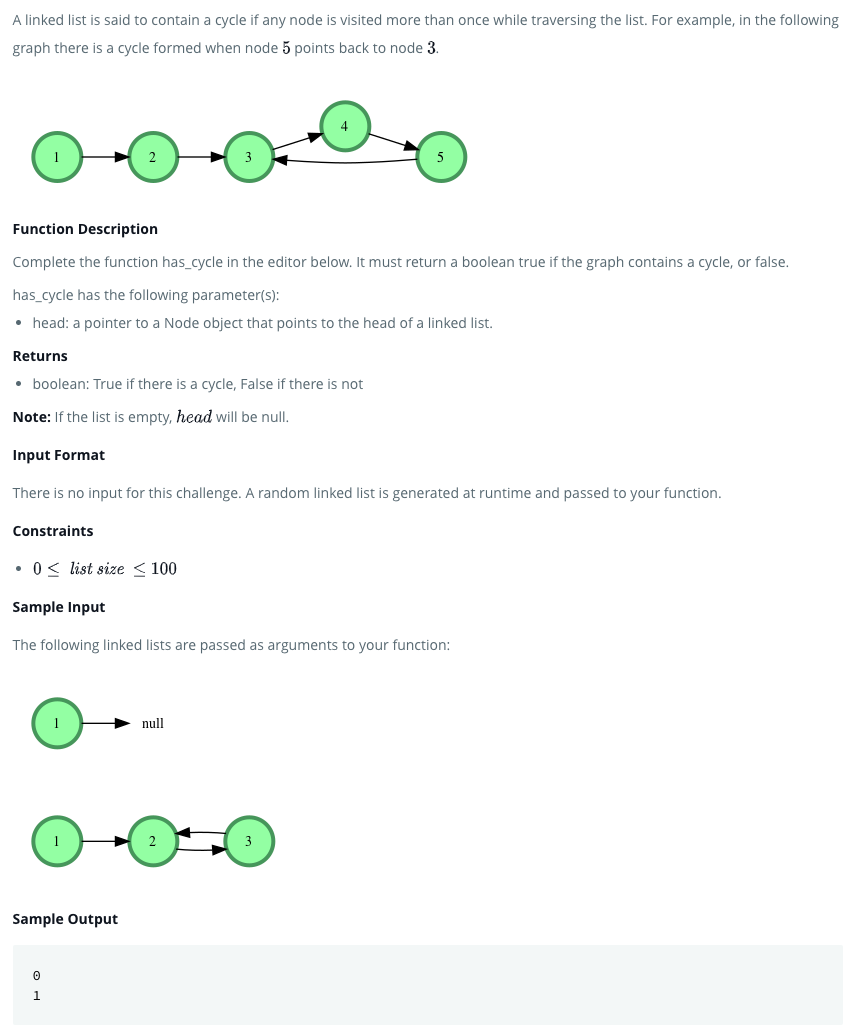

```python
"""
Detect a cycle in a linked list. Note that the head pointer may be 'None' if the list is empty.

A Node is defined as: 
 
    class Node(object):
        def __init__(self, data = None, next_node = None):
            self.data = data
            self.next = next_node
"""


def has_cycle(head):
    
    while head.next:
        if head.next.data == head.data:
            return 1
    return 0
```

## Sorting: Bubble Sort

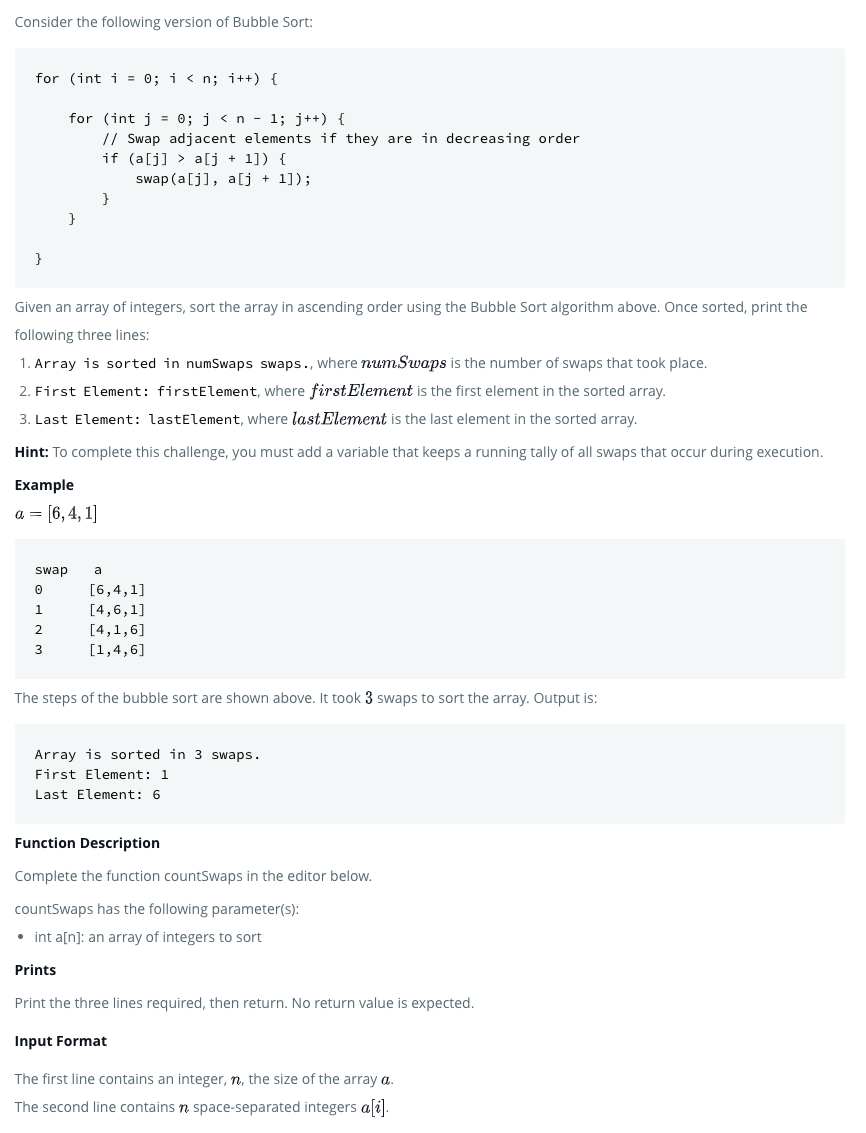

```python
#!/bin/python

import math
import os
import random
import re
import sys

# Complete the countSwaps function below.
def countSwaps(a):
    swapes = 0
    swaped = False
    for i in xrange(0, len(a)-1):
        for j in xrange(0, len(a)-1):
            if a[j] > a[j+1]:
                a[j], a[j+1] = a[j+1], a[j]
                
                swapes += 1
                swaped = True
        if swaped:
            swaped = False
        else:
            break
    print 'Array is sorted in %s swaps.' % swapes
    print 'First Element: %s' % a[0]
    print 'Last Element: %s' % a[-1]

if __name__ == '__main__':
    n = int(raw_input())

    a = map(int, raw_input().rstrip().split())

    countSwaps(a)
```

## Mark and Toys

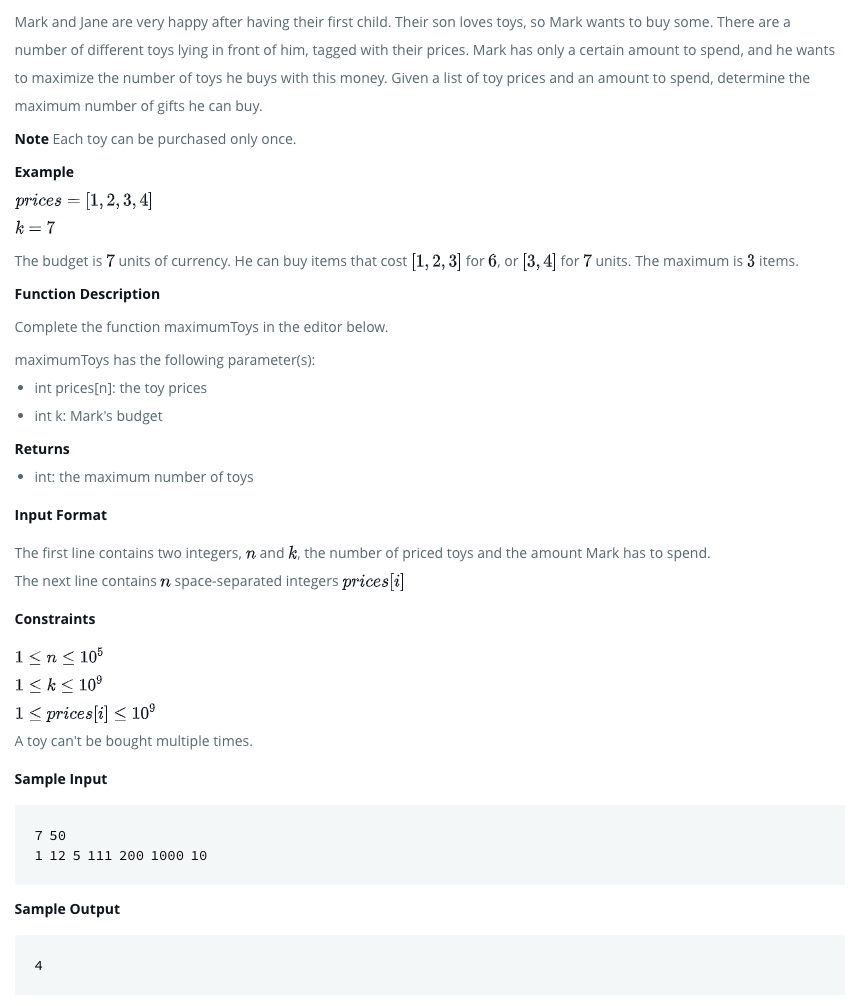

```python
#!/bin/python

import math
import os
import random
import re
import sys

# Complete the maximumToys function below.
def maximumToys(prices, k):
    sort_prices = sorted(prices)
    total = 0
    num_toys = 0
    for i in sort_prices:
        total += i
        if total > k:
            break
        num_toys += 1
        
    return num_toys
        

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    nk = raw_input().split()

    n = int(nk[0])

    k = int(nk[1])

    prices = map(int, raw_input().rstrip().split())

    result = maximumToys(prices, k)

    fptr.write(str(result) + '\n')

    fptr.close()
```

## Sorting: Comparator

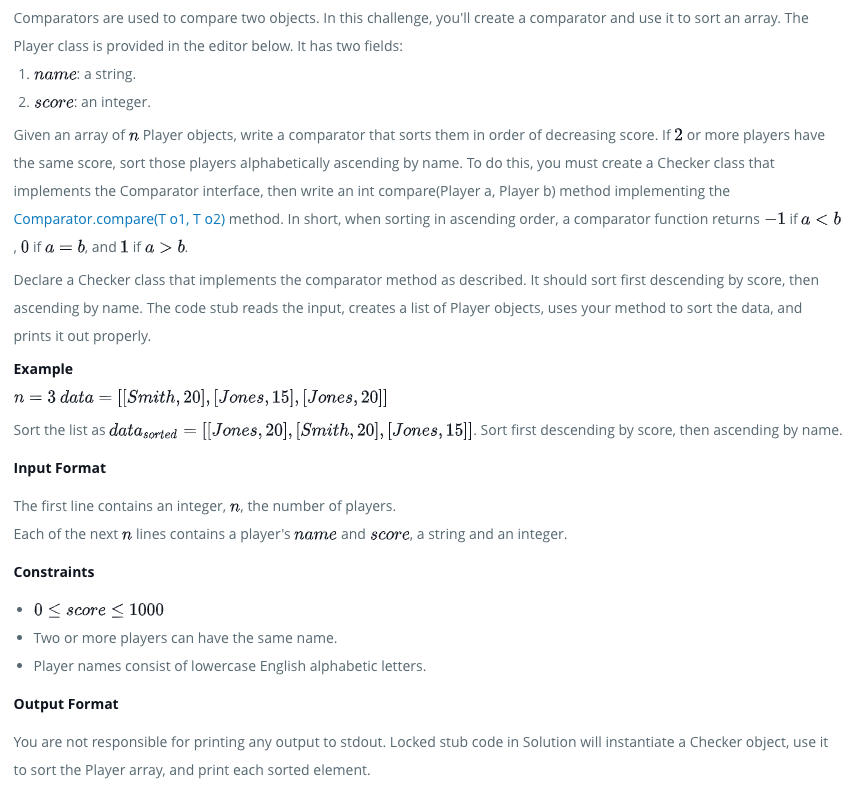

```python
# Enter your code here. Read input from STDIN. Print output to STDOUT
class Player:
    def __init__(self, name, score):
        self.name = name
        self.score = score
        
    def __repr__(self):
        pass
        
    def comparator(a, b):
        if a.score > b.score:
            return -1
        elif a.score < b.score:
            return 1
        elif a.score == b.score:
            if a.name > b.name:
                return 1
            elif a.name < b.name:
                return -1
            else:
                return 0
```

## Fraudulent Activity Notifications

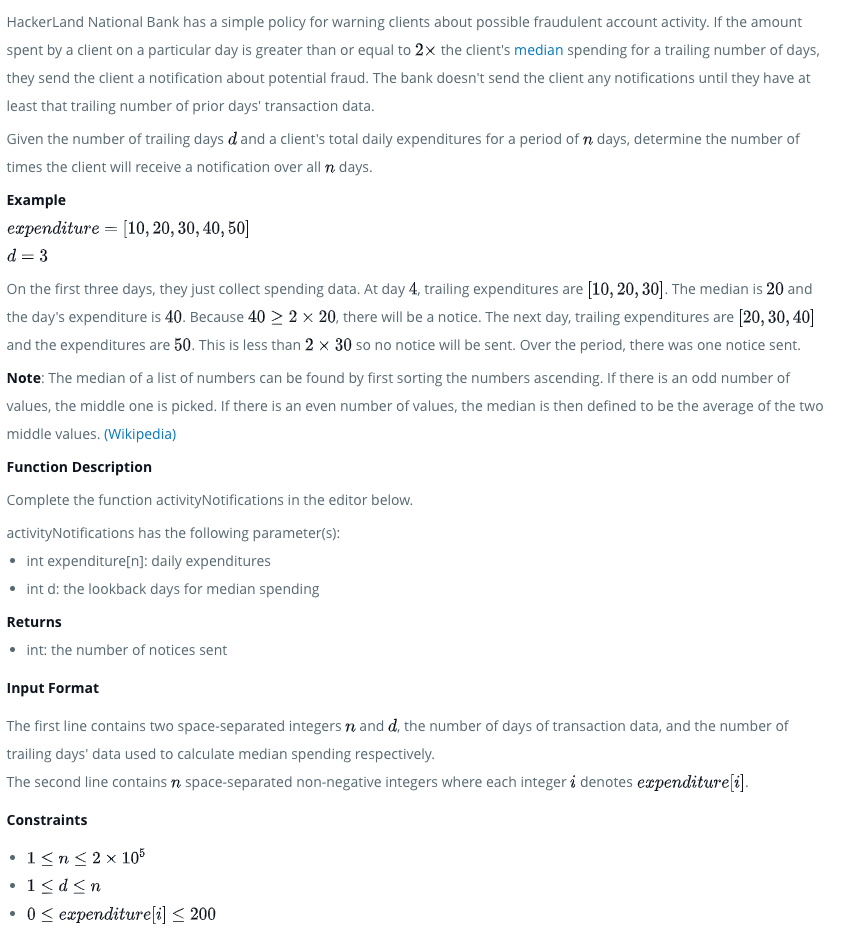

```python
#!/bin/python

import math
import os
import random
import re
import sys
import bisect

def findmedian(lst, half, even):
    if  even: # made a median of 2 central elements
        return (lst[half] + lst[half + 1]) / 2.0
    else: # return central element
        return lst[half]

# Complete the activityNotifications function below.
def activityNotifications(expenditure, d):
    int_day = 0
    last_day = d
    notify = 0
    n = len(expenditure)
    median_arr = sorted(expenditure[int_day:last_day])
    n_median = len(median_arr) # len of median array will be fixed
    half = int(math.ceil(n_median/2.0) - 1)
    even = True if n_median % 2 == 0 else False 
    while last_day < n:
        med = findmedian(median_arr, half, even)
        last_day_exp = expenditure[last_day]
        if last_day_exp >= med*2:
            notify += 1
        
        j = bisect.bisect_left(median_arr, expenditure[int_day])
        del median_arr[j] # remove the element to keep the median_arr with the same length
        bisect.insort(median_arr, last_day_exp)
        # increment the days
        int_day += 1
        last_day += 1
        
    return notify

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    nd = raw_input().split()

    n = int(nd[0])

    d = int(nd[1])

    expenditure = map(int, raw_input().rstrip().split())

    result = activityNotifications(expenditure, d)

    fptr.write(str(result) + '\n')

    fptr.close()
```